# Machine Learning Models for Stock Market Prediction

<i>Module Code: CS3IP16  
Report Title: A comparison of machine learning models in predicting stock market prices  
Student Number: 27816792  
Date of Completion: 20/04/2023</i>

## Table of Contents 
1. [Importing Libraries](#import)
2. [The Dataframe](#display)
4. [Exploratory Data Analysis](#eda)
    2. [Data Pre-processing](#prepro)  
        1. [Data Reduction](#sample)  
        2. [Data Cleaning](#clean)
    3. [New Column](#new)
    4. [Statistical Calculations](#stats)
    5. [Data Visualisation](#visual)
5. [Machine Learning Models](#mlm)
    1. [Linear Regression](#lr)
    2. [Random Forest](#rforest)
    2. [ARIMA](#arima)
    3. [Long-Short Term Memory](#lstm)
    4. [Convolutional Neural Network](#cnn)
    5. [Joint ML Evaluation](#eval)
    1. [Decision Tree Classifier](#dtc)

## Importing Libraries <a name='import'></a>

In [1]:
# dataframe manipulation
import pandas as pd

# mathematical calculations
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sb

# exploratory data analysis
import fyp_eda

# machine learning models
import fyp_dtc
import fyp_lr
import fyp_rForest
import fyp_arima
import fyp_lstm
import fyp_cnn

## DataFrames <a name='display'></a>

Column | Description
-|:-
Date | date (yyyy-MM-DD)
Open | initial price; price when market is open
High | highest price of the day
Low | lowest price of the day
Close | closing price; price when market is closed
Adj Close | adjusted closing price; closing price after factoring corporate actions
Volume | Number of shares traded in the date specified

In [2]:
# set dataframe to read target csv file
# apple stock
apple_df = pd.read_csv(r'C:\Users\asals\OneDrive\Documents\FYP\datasets\AAPL.csv')
apple_df.sample(5)

Date      Open      High       Low     Close  Adj Close     Volume
4784  1999-11-17  3.238839  3.383929  3.214286  3.223214   2.797882   91142800
2273  1989-12-11  1.464286  1.482143  1.370536  1.401786   1.136795  162503600
3592  1995-03-01  1.419643  1.433036  1.407924  1.428571   1.229418   56112000
2029  1988-12-22  1.491071  1.500000  1.455357  1.464286   1.175936   26507600
5791  2003-11-20  1.435714  1.505714  1.435714  1.455714   1.263619   59897600

In [3]:
# alphabet stock
google_df = pd.read_csv(r'C:\Users\asals\OneDrive\Documents\FYP\datasets\GOOGL.csv')
google_df.sample(5)

Date         Open         High          Low        Close  \
2480  2014-06-26   589.299988   589.599976   579.599976   584.770020   
3868  2019-12-31  1335.790039  1340.660034  1332.130005  1339.390015   
1858  2012-01-04   332.847839   335.460449   330.640656   334.474487   
1466  2010-06-16   248.333328   252.252258   248.303299   250.885880   
663   2007-04-10   233.778778   235.630630   232.812820   233.483490   

        Adj Close   Volume  
2480   584.770020  2012400  
3868  1339.390015   975700  
1858   334.474487  5722200  
1466   250.885880  4574000  
663    233.483490  5952600

In [4]:
# microsoft stock
msft_df = pd.read_csv(r'C:\Users\asals\OneDrive\Documents\FYP\datasets\MSFT.csv')
msft_df.sample(5)

Date       Open       High        Low      Close  Adj Close  \
1092  1990-07-09   1.020833   1.038194   1.017361   1.031250   0.661655   
509   1988-03-17   0.451389   0.454861   0.442708   0.443576   0.284601   
266   1987-04-01   0.335938   0.342882   0.314236   0.315972   0.202729   
5764  2009-01-20  19.459999  19.620001  18.370001  18.480000  14.173573   
2134  1994-08-19   3.492188   3.500000   3.421875   3.429688   2.200505   

         Volume  
1092   37315200  
509   125308800  
266   259430400  
5764   89873000  
2134   74761600

## Exploratory Data Analysis <a name='eda'></a>

In [5]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [6]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 215.2+ KB


In [7]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8584 non-null   object 
 1   Open       8584 non-null   float64
 2   High       8584 non-null   float64
 3   Low        8584 non-null   float64
 4   Close      8584 non-null   float64
 5   Adj Close  8584 non-null   float64
 6   Volume     8584 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 469.6+ KB


### Data Pre-processing <a name='prepro'></a>

#### Data Reduction <a name='sample'></a>

In [8]:
apple_df  = fyp_eda.reduct(apple_df)
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 7078 to 9593
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


In [9]:
google_df = fyp_eda.reduct(google_df)
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 1101 to 3616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


In [10]:
msft_df = fyp_eda.reduct(msft_df)
msft_df.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 5753 to 8268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


#### Data Cleaning <a name='clean'></a>

In [11]:
# clean df from unwanted columns, duplicate & missing values
apple_df = fyp_eda.cleaning(apple_df)

# print sample of df after cleaning
apple_df.sample(5)

Date        Open        High         Low       Close
9323 2017-12-01  169.949997  171.669998  168.500000  171.050003
8893 2016-03-21  105.930000  107.650002  105.139999  105.910004
8875 2016-02-24   93.980003   96.379997   93.320000   96.099998
8669 2015-04-30  128.639999  128.639999  124.580002  125.150002
7277 2009-10-16   27.049999   27.194286   26.834286   26.864286

In [12]:
# clean df from unwanted columns, duplicate & missing values
google_df = fyp_eda.cleaning(google_df)

# print sample of df after cleaning
google_df.sample(5)

Date        Open        High         Low       Close
1163 2009-04-02  181.836838  185.065063  180.340347  181.431427
2839 2015-11-27  769.159973  774.000000  767.000000  771.969971
2836 2015-11-23  777.469971  782.900024  773.510010  776.700012
2165 2013-03-27  403.743744  403.903900  401.066071  401.731720
1735 2011-07-11  264.354340  268.258270  263.013000  263.903900

In [13]:
# clean df from unwanted columns, duplicate & missing values
msft_df = fyp_eda.cleaning(msft_df)

# print sample of df after cleaning
msft_df.sample(5)

Date        Open        High         Low       Close
6360 2011-06-01   24.990000   25.100000   24.370001   24.430000
7003 2013-12-19   36.509998   36.549999   36.080002   36.250000
8124 2018-06-05  102.000000  102.330002  101.529999  102.190002
6131 2010-07-06   23.700001   24.090000   23.580000   23.820000
7888 2017-06-27   70.110001   70.180000   69.180000   69.209999

### New Column <a name='new'></a>

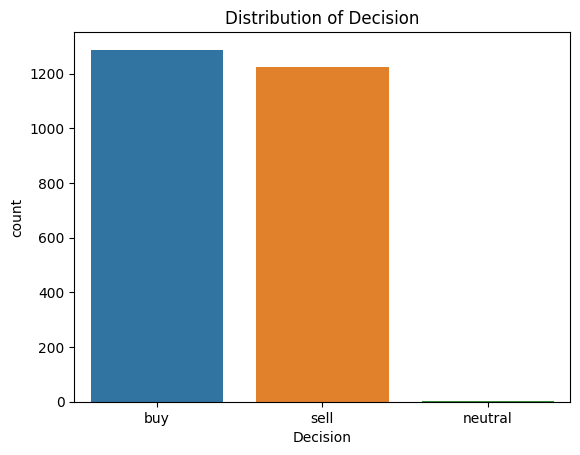

Date        Open        High         Low       Close Decision
9233 2017-07-26  153.350006  153.929993  153.059998  153.460007      buy
8639 2015-03-18  127.000000  129.160004  126.370003  128.470001      buy
7349 2010-02-01   27.481428   28.000000   27.328571   27.818571      buy
7129 2009-03-18   14.272857   14.782857   14.245714   14.502857      buy
7900 2012-04-09   89.447144   91.405716   89.328575   90.889999      buy

In [14]:
# add decision column for classification
# implement new column (decision) on df
apple_df['Decision'] = apple_df.apply(lambda row: fyp_eda.decision(row['Open'], row['Close']), axis=1)

# plot distribution of unique values of decision
sb.countplot(x = apple_df['Decision'])
plt.title('Distribution of Decision')
plt.show()

# print sample of df after new column addition
apple_df.sample(5)

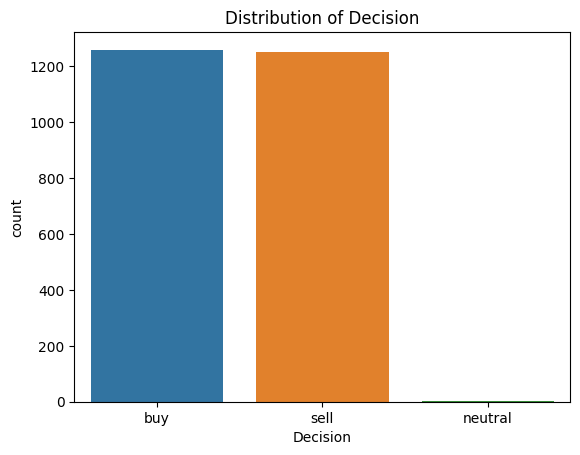

Date         Open         High          Low        Close Decision
2953 2016-05-12   732.000000   735.369995   724.270020   728.070007     sell
1697 2011-05-16   263.418427   263.898895   258.458466   259.469482     sell
1470 2010-06-22   245.195190   248.548553   243.108109   243.368362     sell
1855 2011-12-29   321.066071   321.821808   317.917908   321.521515      buy
3458 2018-05-15  1096.900024  1099.119995  1078.780029  1084.869995     sell

In [15]:
# add decision column for classification
# implement new column (decision) on df
google_df['Decision'] = google_df.apply(lambda row: fyp_eda.decision(row['Open'], row['Close']), axis=1)

# plot distribution of unique values of decision
sb.countplot(x = google_df['Decision'])
plt.title('Distribution of Decision')
plt.show()

# print sample of df after new column addition
google_df.sample(5)

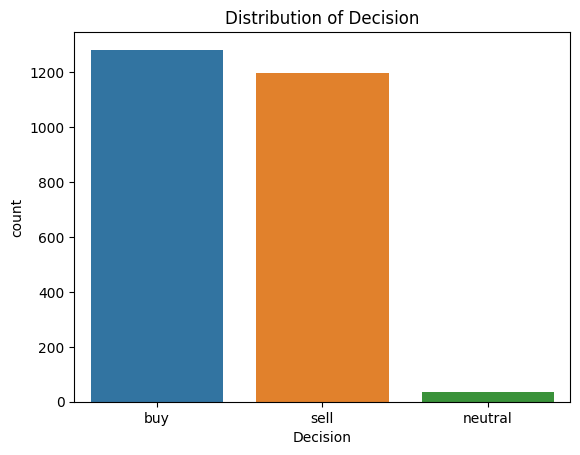

Date       Open       High        Low      Close Decision
7889 2017-06-28  69.209999  69.839996  68.790001  69.800003      buy
7544 2016-02-16  50.900002  51.090000  50.130001  51.090000      buy
8096 2018-04-25  93.300003  93.300003  90.279999  92.309998     sell
5757 2009-01-08  19.629999  20.190001  19.549999  20.120001      buy
7447 2015-09-25  44.480000  44.730000  43.759998  43.939999     sell

In [16]:
# add decision column for classification
# implement new column (decision) on df
msft_df['Decision'] = msft_df.apply(lambda row: fyp_eda.decision(row['Open'], row['Close']), axis=1)

# plot distribution of unique values of decision
sb.countplot(x = msft_df['Decision'])
plt.title('Distribution of Decision')
plt.show()

# print sample of df after new column addition
msft_df.sample(5)

### Statistical Calculations <a name='stats'></a>

In [17]:
# statistical calculations of numerical columns 
# rounded to 2 decimal places
round(apple_df.describe(), 2)

Open     High      Low    Close
count  2516.00  2516.00  2516.00  2516.00
mean     91.60    92.41    90.73    91.59
std      50.27    50.69    49.86    50.27
min      11.34    11.71    11.17    11.17
25%      51.03    51.42    50.56    50.96
50%      85.79    86.69    84.98    86.11
75%     118.92   119.88   118.21   119.15
max     230.78   233.47   229.78   232.07

In [18]:
# statistical calculations of numerical columns 
# rounded to 2 decimal places
round(google_df.describe(), 2)

Open     High      Low    Close
count  2516.00  2516.00  2516.00  2516.00
mean    554.97   559.66   549.82   554.84
std     296.36   298.91   293.52   296.25
min     144.32   149.90   141.52   141.52
25%     295.26   297.05   292.10   295.12
50%     523.83   530.53   518.29   522.97
75%     770.34   777.84   764.17   770.07
max    1289.12  1291.44  1263.00  1285.50

In [19]:
# statistical calculations of numerical columns 
# rounded to 2 decimal places
round(msft_df.describe(), 2)

Open     High      Low    Close
count  2516.00  2516.00  2516.00  2516.00
mean     45.55    45.95    45.14    45.56
std      23.95    24.14    23.70    23.93
min      15.20    15.62    14.87    15.15
25%      27.64    27.91    27.33    27.63
50%      37.23    37.54    36.90    37.21
75%      55.57    55.98    55.10    55.68
max     115.42   116.18   114.93   115.61

### Data Visualisation <a name='visual'></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 7078 to 9593
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2516 non-null   datetime64[ns]
 1   Open      2516 non-null   float64       
 2   High      2516 non-null   float64       
 3   Low       2516 non-null   float64       
 4   Close     2516 non-null   float64       
 5   Decision  2516 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.6+ KB




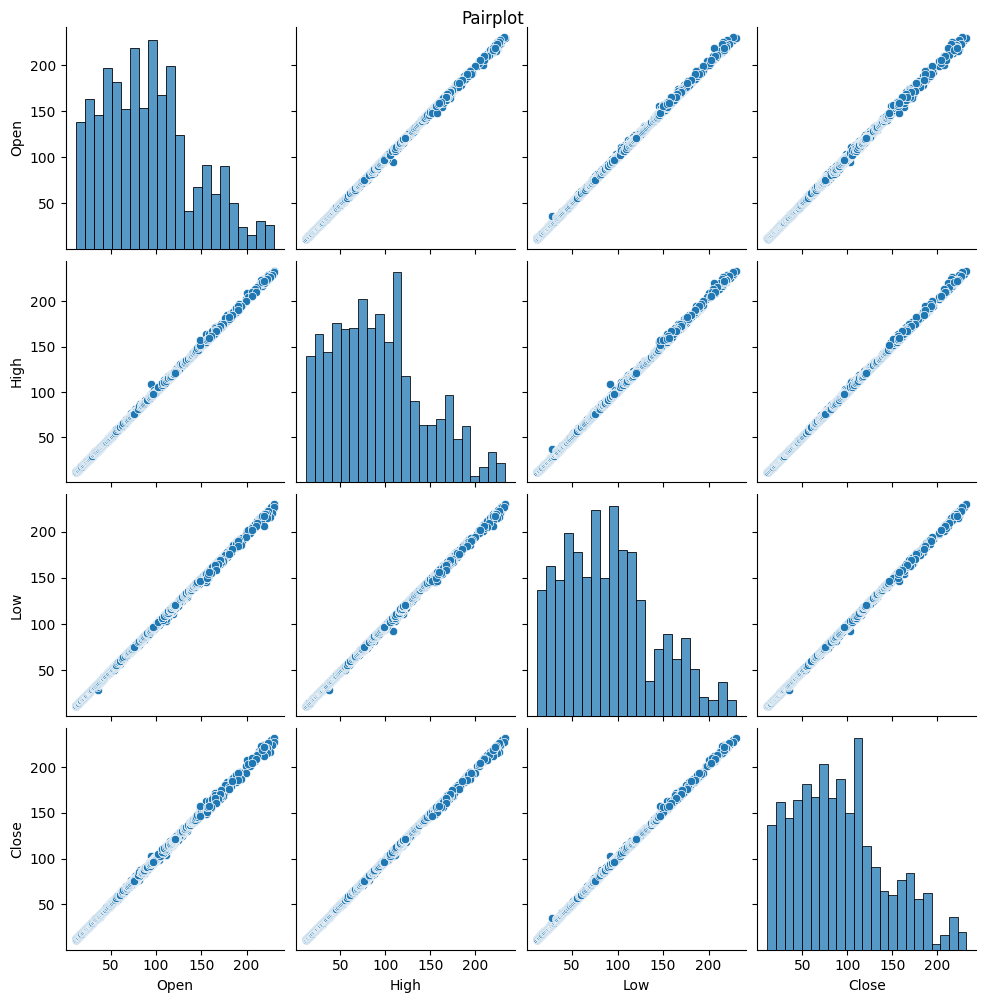



Correlation Table
           Open      High       Low     Close
Open   1.000000  0.999859  0.999809  0.999666
High   0.999859  1.000000  0.999770  0.999838
Low    0.999809  0.999770  1.000000  0.999848
Close  0.999666  0.999838  0.999848  1.000000




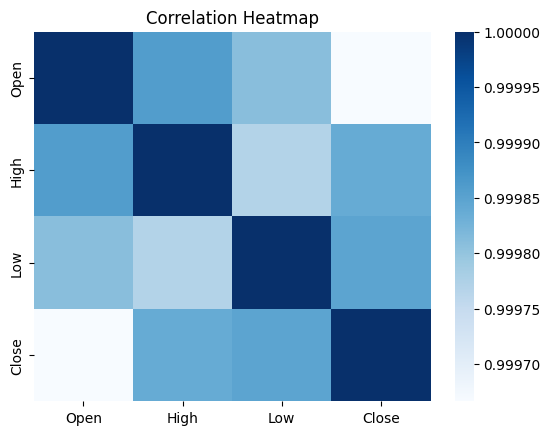

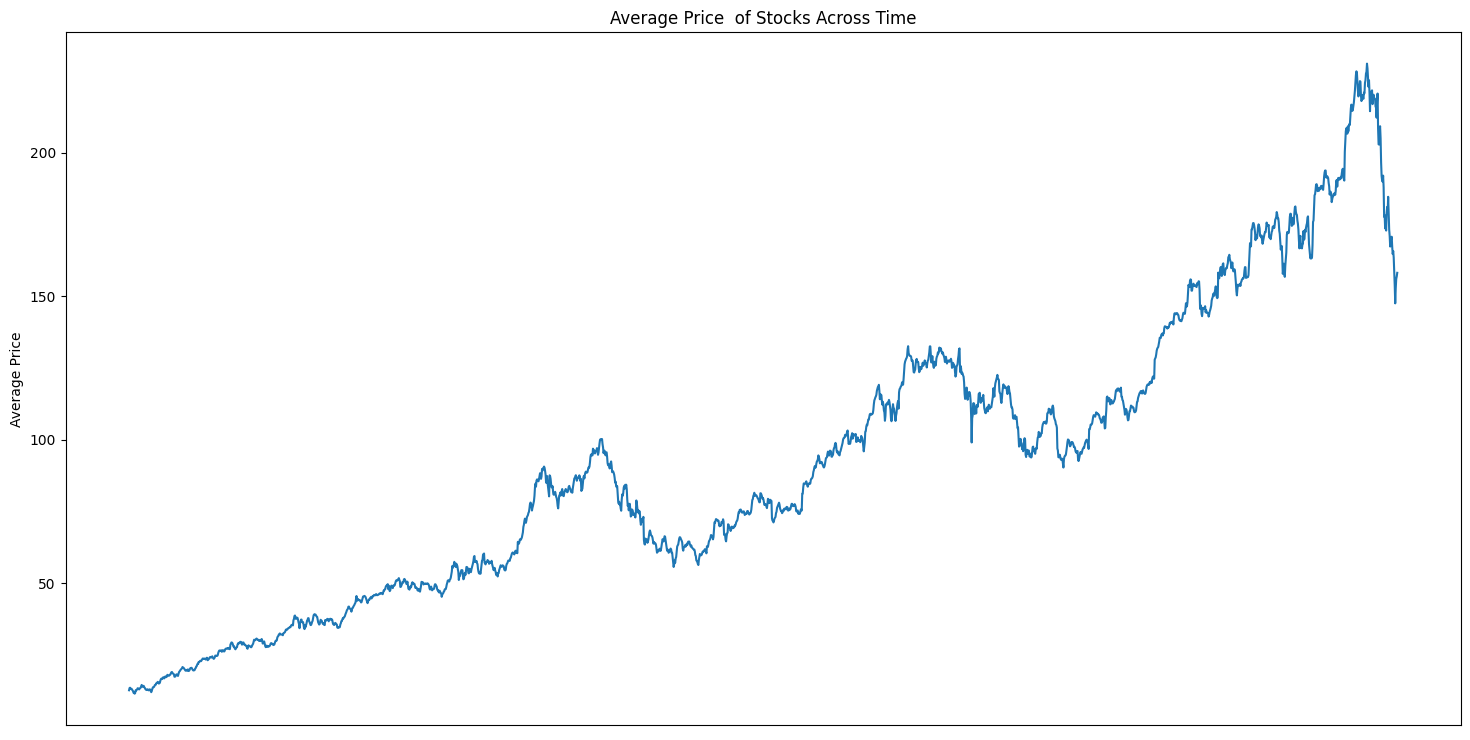

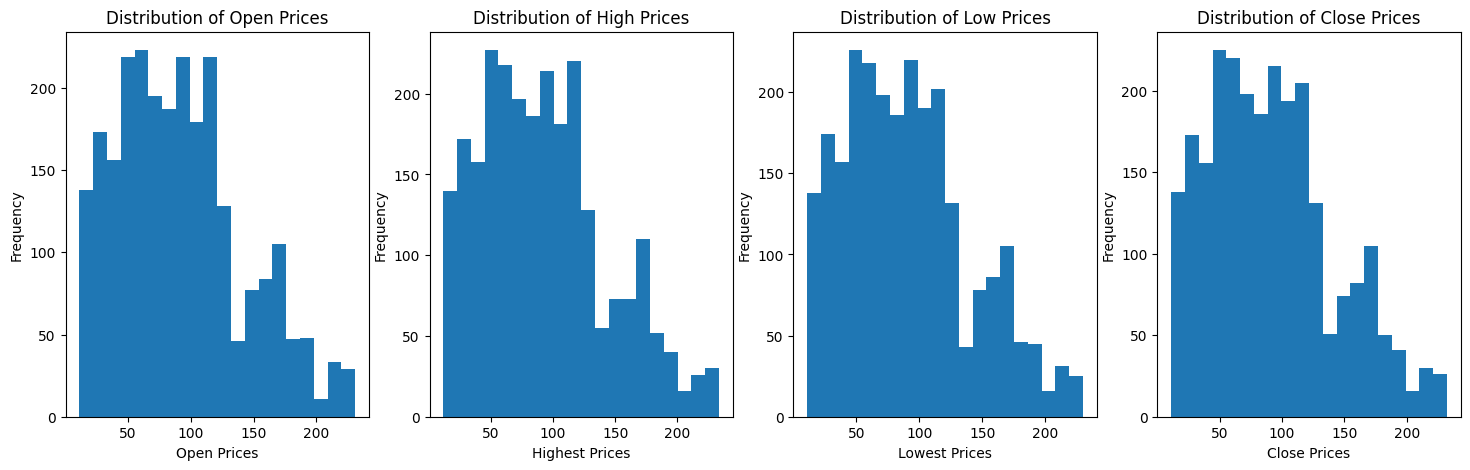



The Mean Value of Returns = 0.001134447308647387
The Standard Deviation of Returns = 0.016760304548303743
Skewness of Returns is: 3.942880664954826e-05
Kurtosis of Returns is: 3.5190445896009024




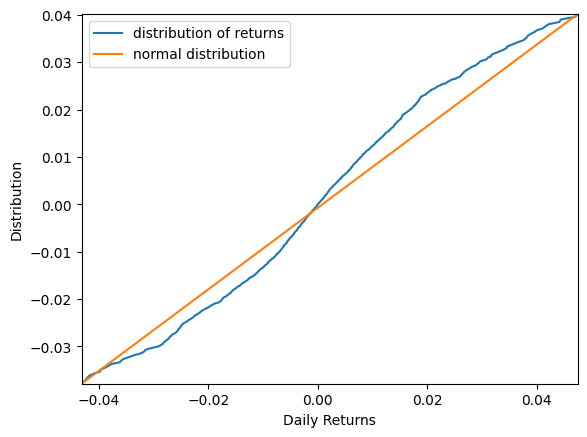

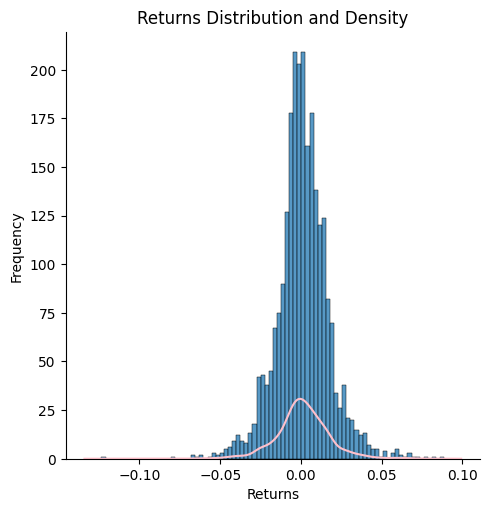

In [20]:
# apply eda function to df
fyp_eda.eda(apple_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 1101 to 3616
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2516 non-null   datetime64[ns]
 1   Open      2516 non-null   float64       
 2   High      2516 non-null   float64       
 3   Low       2516 non-null   float64       
 4   Close     2516 non-null   float64       
 5   Decision  2516 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.6+ KB




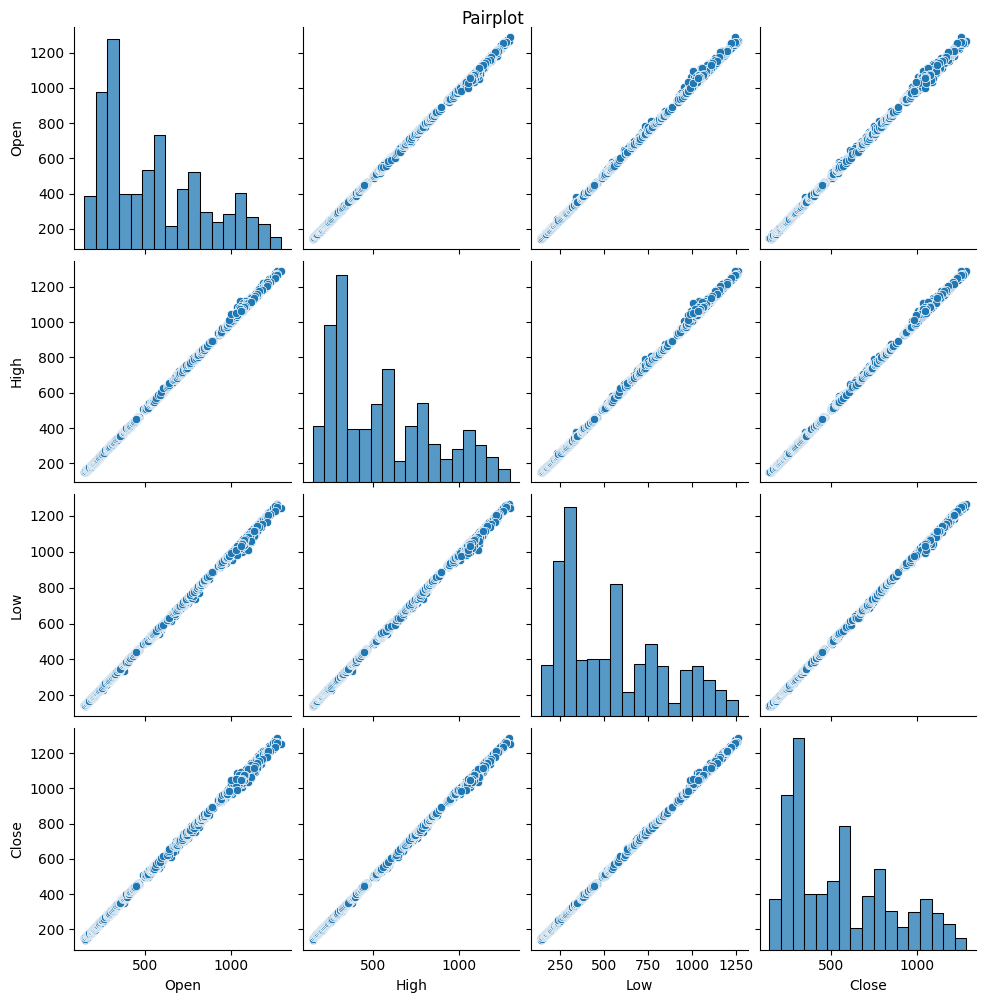



Correlation Table
           Open      High       Low     Close
Open   1.000000  0.999864  0.999792  0.999660
High   0.999864  1.000000  0.999767  0.999823
Low    0.999792  0.999767  1.000000  0.999864
Close  0.999660  0.999823  0.999864  1.000000




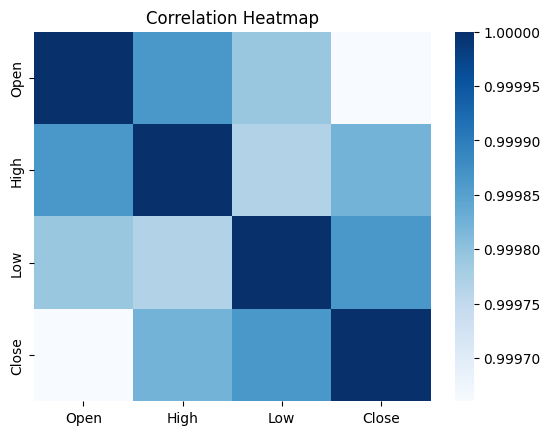

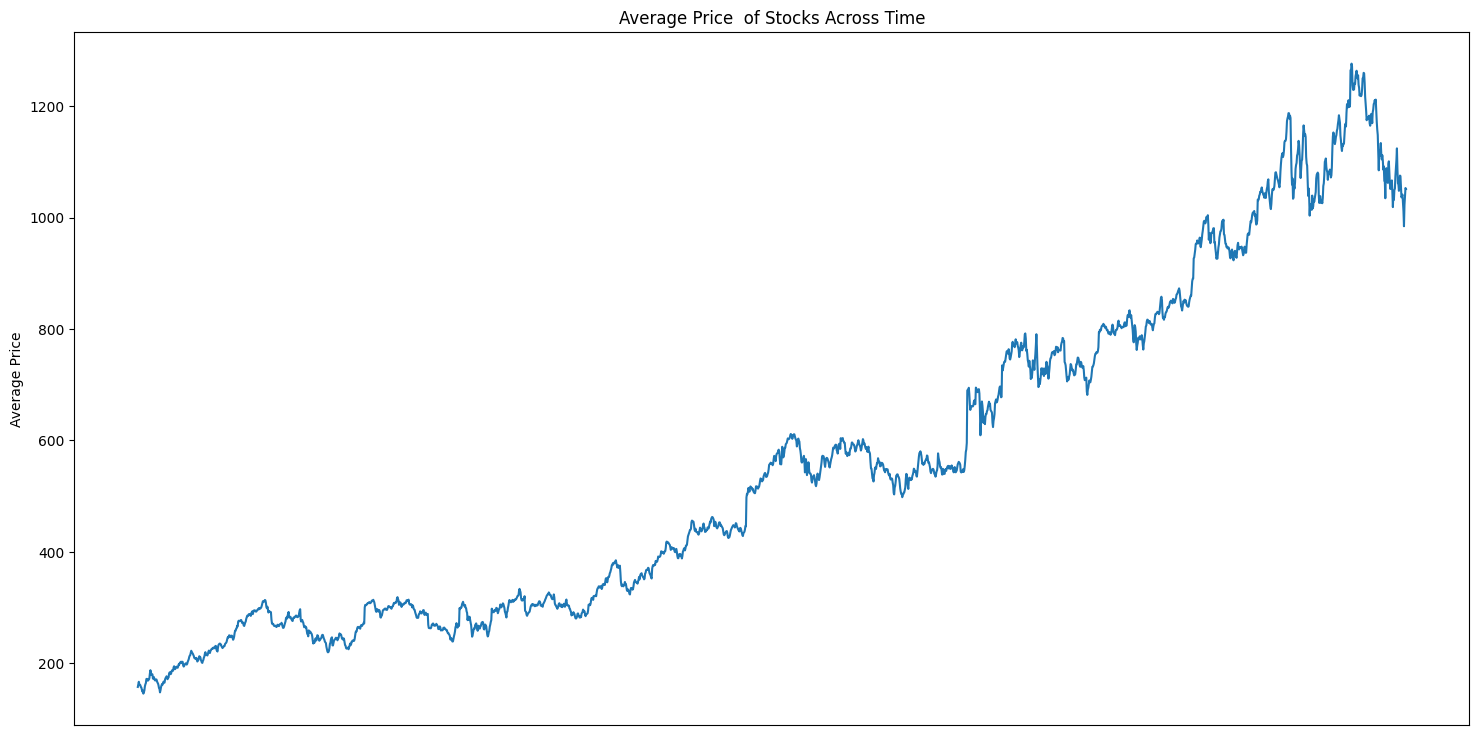

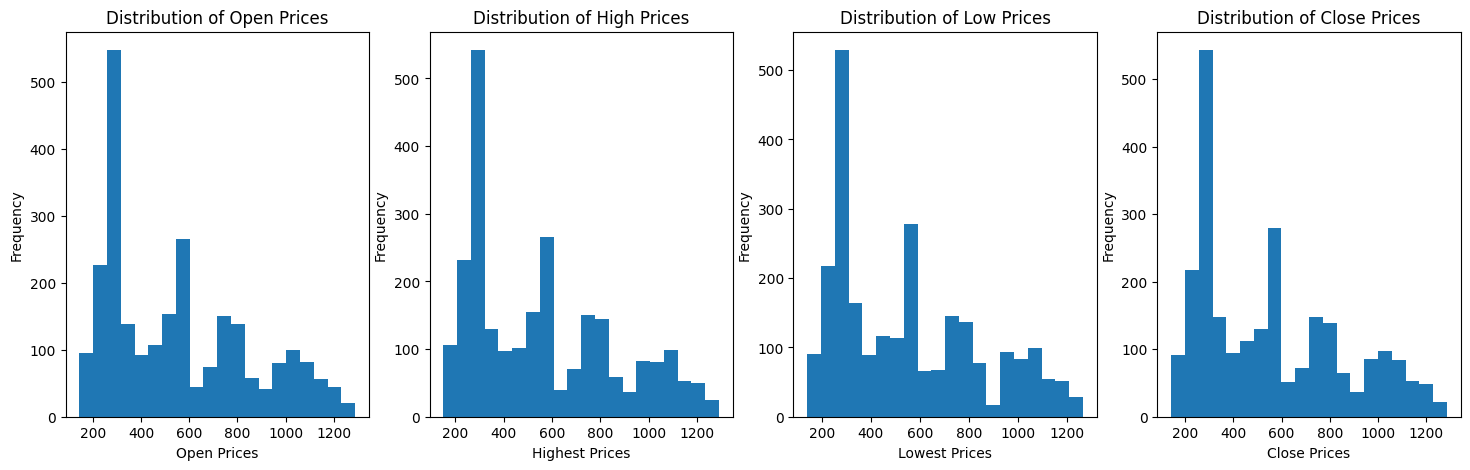



The Mean Value of Returns = 0.0008678557191190831
The Standard Deviation of Returns = 0.015770957401639266
Skewness of Returns is: 0.7588409456687321
Kurtosis of Returns is: 11.541755916950159




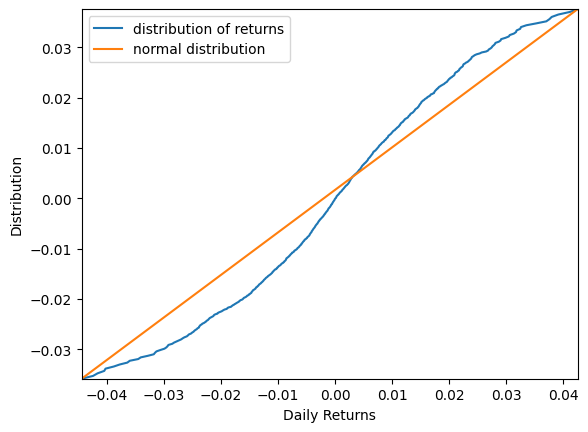

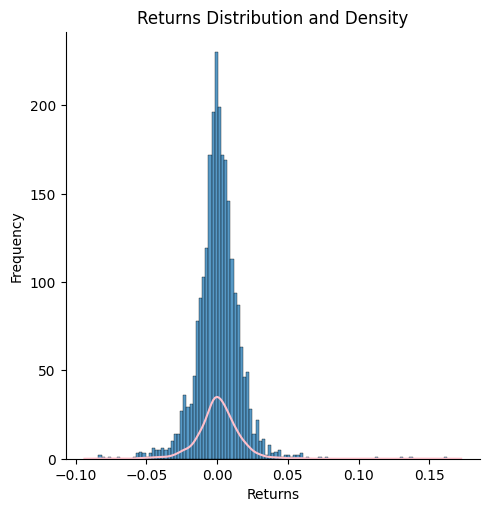

In [21]:
# apply eda function to df
fyp_eda.eda(google_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 5753 to 8268
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2516 non-null   datetime64[ns]
 1   Open      2516 non-null   float64       
 2   High      2516 non-null   float64       
 3   Low       2516 non-null   float64       
 4   Close     2516 non-null   float64       
 5   Decision  2516 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.6+ KB




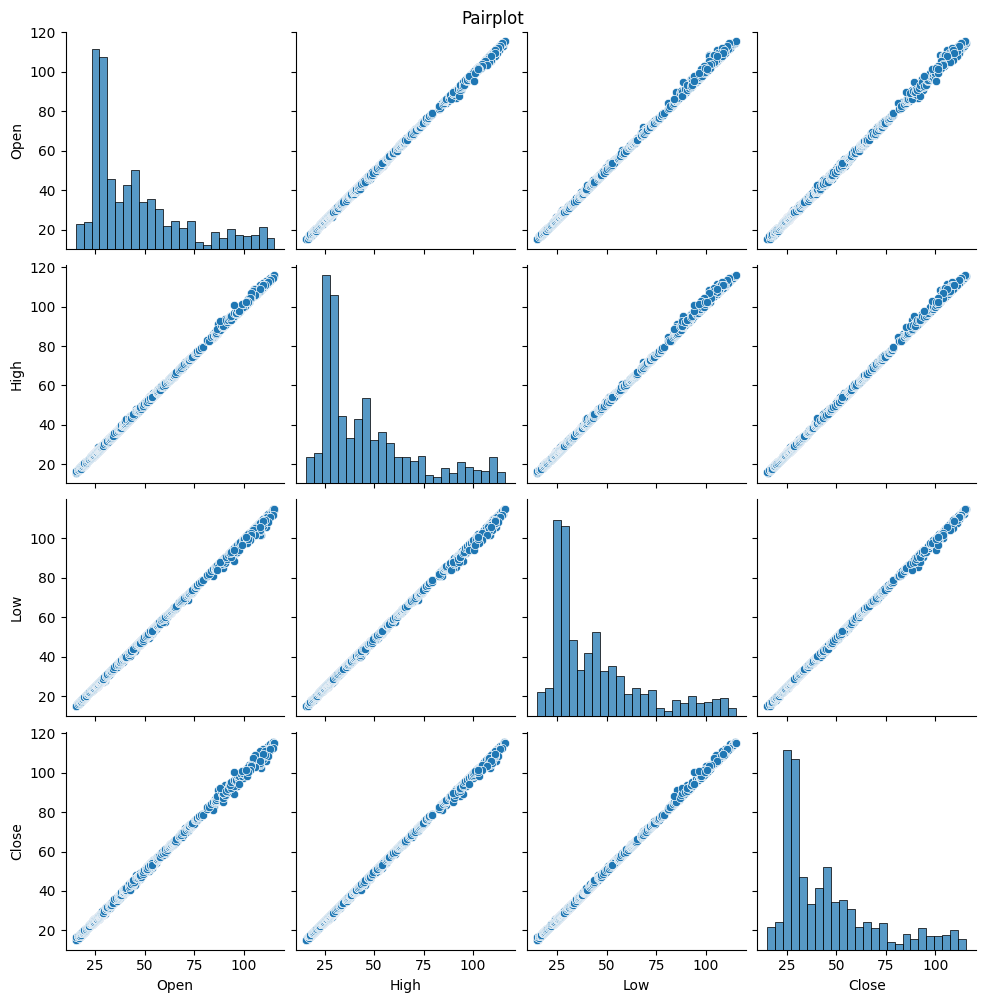



Correlation Table
           Open      High       Low     Close
Open   1.000000  0.999858  0.999785  0.999640
High   0.999858  1.000000  0.999741  0.999811
Low    0.999785  0.999741  1.000000  0.999844
Close  0.999640  0.999811  0.999844  1.000000




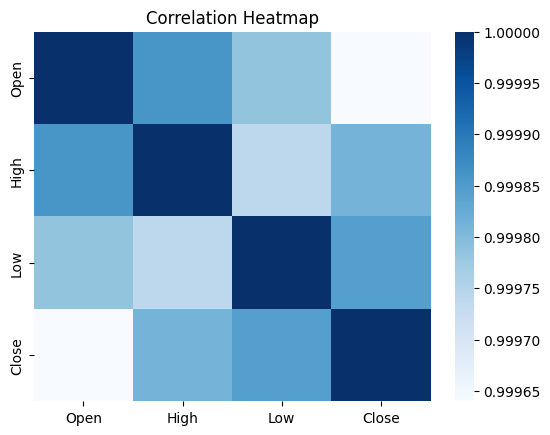

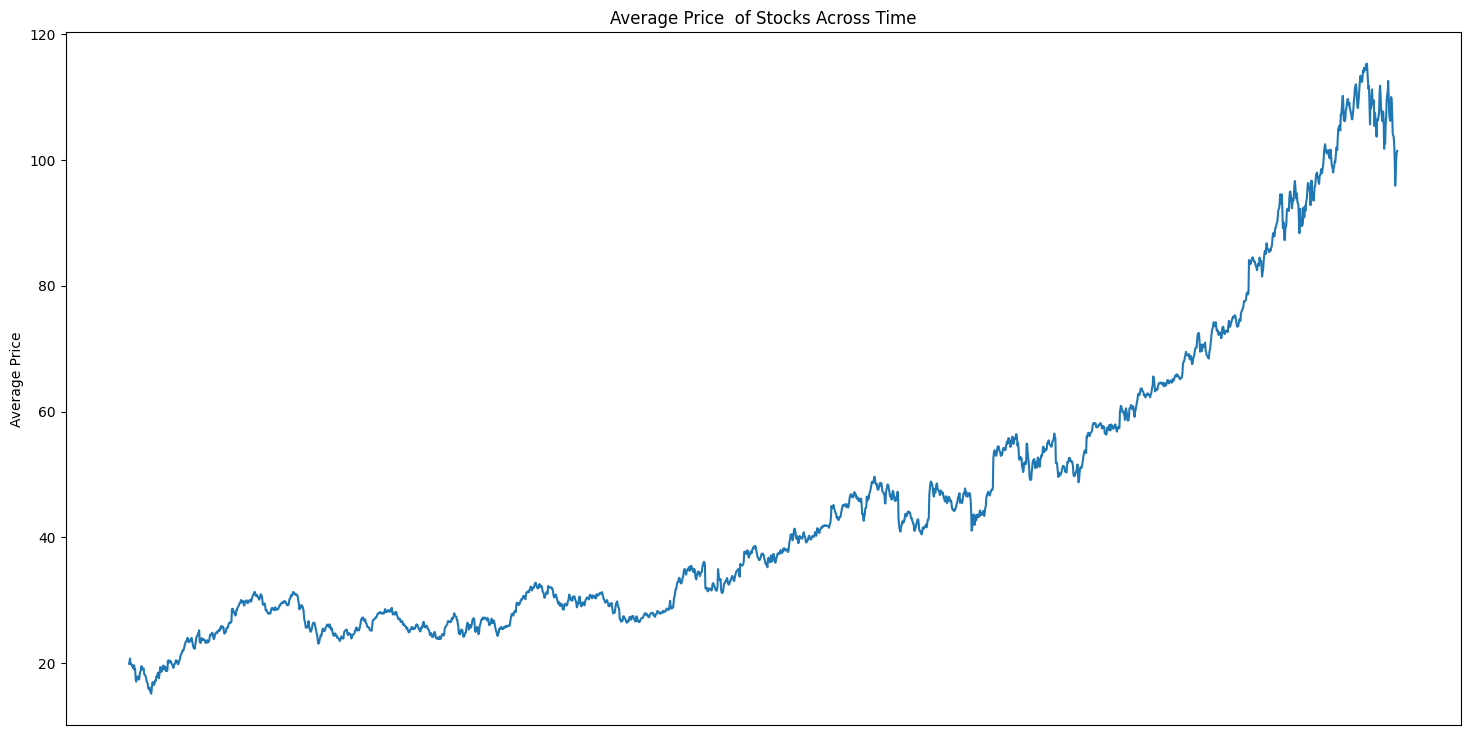

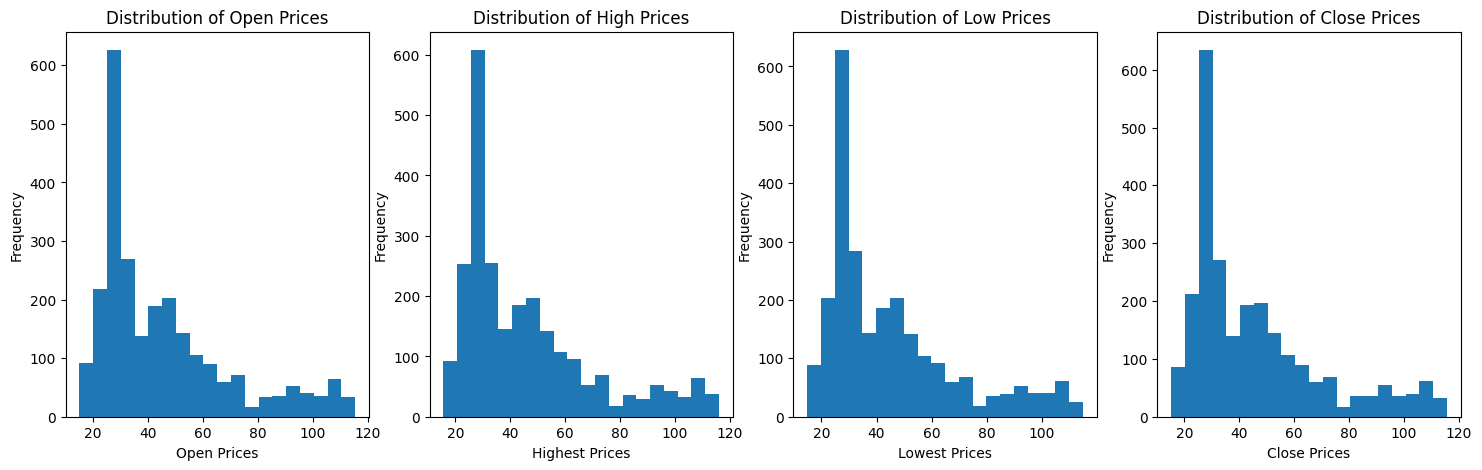



The Mean Value of Returns = 0.0007618179104864302
The Standard Deviation of Returns = 0.015620393270125108
Skewness of Returns is: 0.048425311195841814
Kurtosis of Returns is: 7.287147414218834




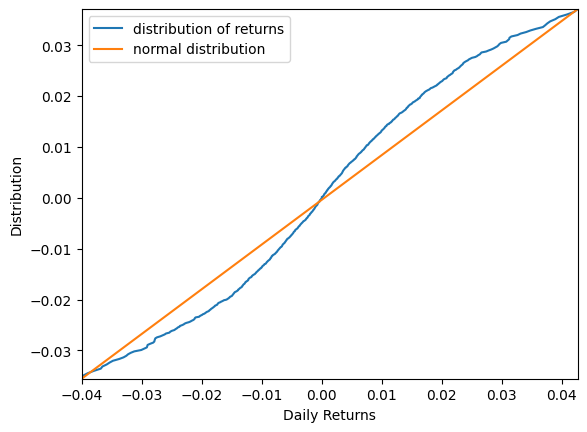

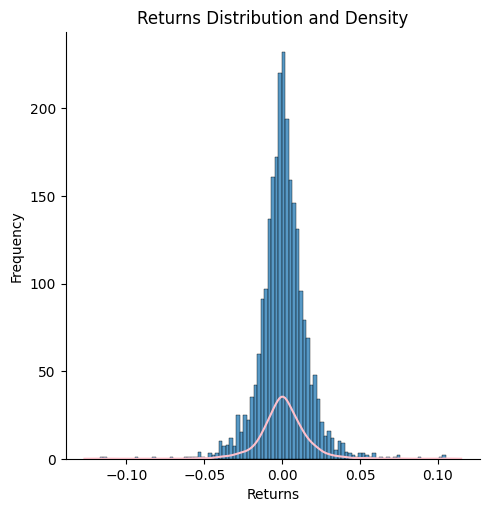

In [22]:
# apply eda function to df
fyp_eda.eda(msft_df)

## Machine Learning Models <a name='mlm'></a>

### Linear Regression <a name='lr'></a>

Time Taken:  0 seconds


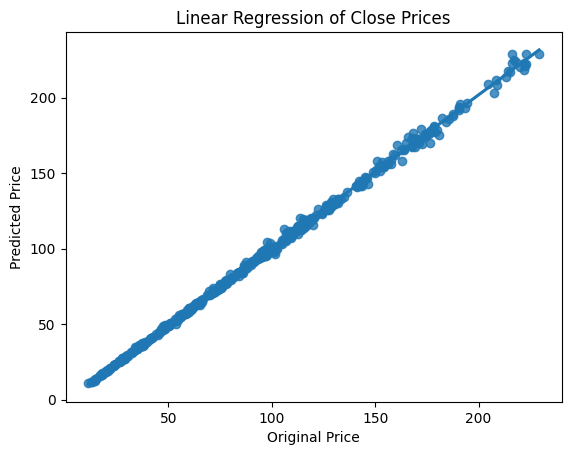

Model Evaluation
Mean Absolute Error: 1.3256280319938236
Root Mean Squared Error: 1.974079139326402
Mean Absolute Percentage Error: 1.7144389291696747%


In [23]:
fyp_lr.linear_reg(apple_df['Close'])

Time Taken:  0 seconds


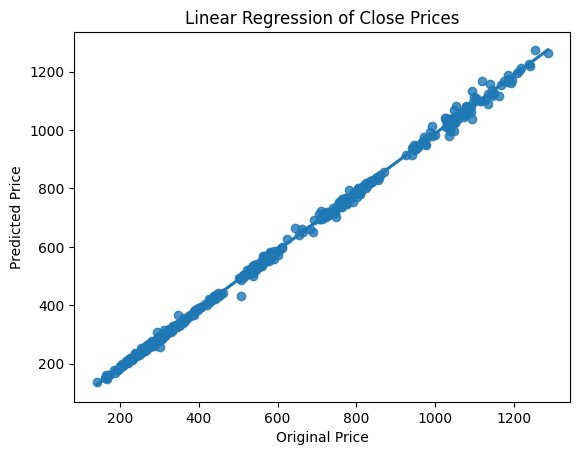

Model Evaluation
Mean Absolute Error: 13.891388345189222
Root Mean Squared Error: 16.153641618814888
Mean Absolute Percentage Error: 3.1149243788762466%


In [24]:
fyp_lr.linear_reg(google_df['Close'])

Time Taken:  0 seconds


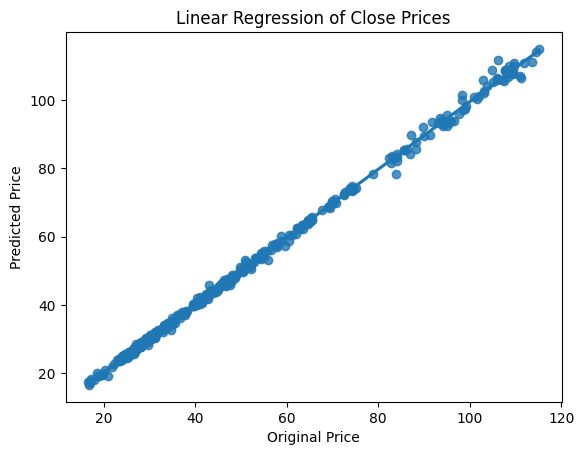

Model Evaluation
Mean Absolute Error: 0.55833034491272
Root Mean Squared Error: 0.880372764719131
Mean Absolute Percentage Error: 1.2317334574420398%


In [25]:
fyp_lr.linear_reg(msft_df['Close'])

### Random Forest <a name='rforest'></a>

Time Taken:  2 seconds


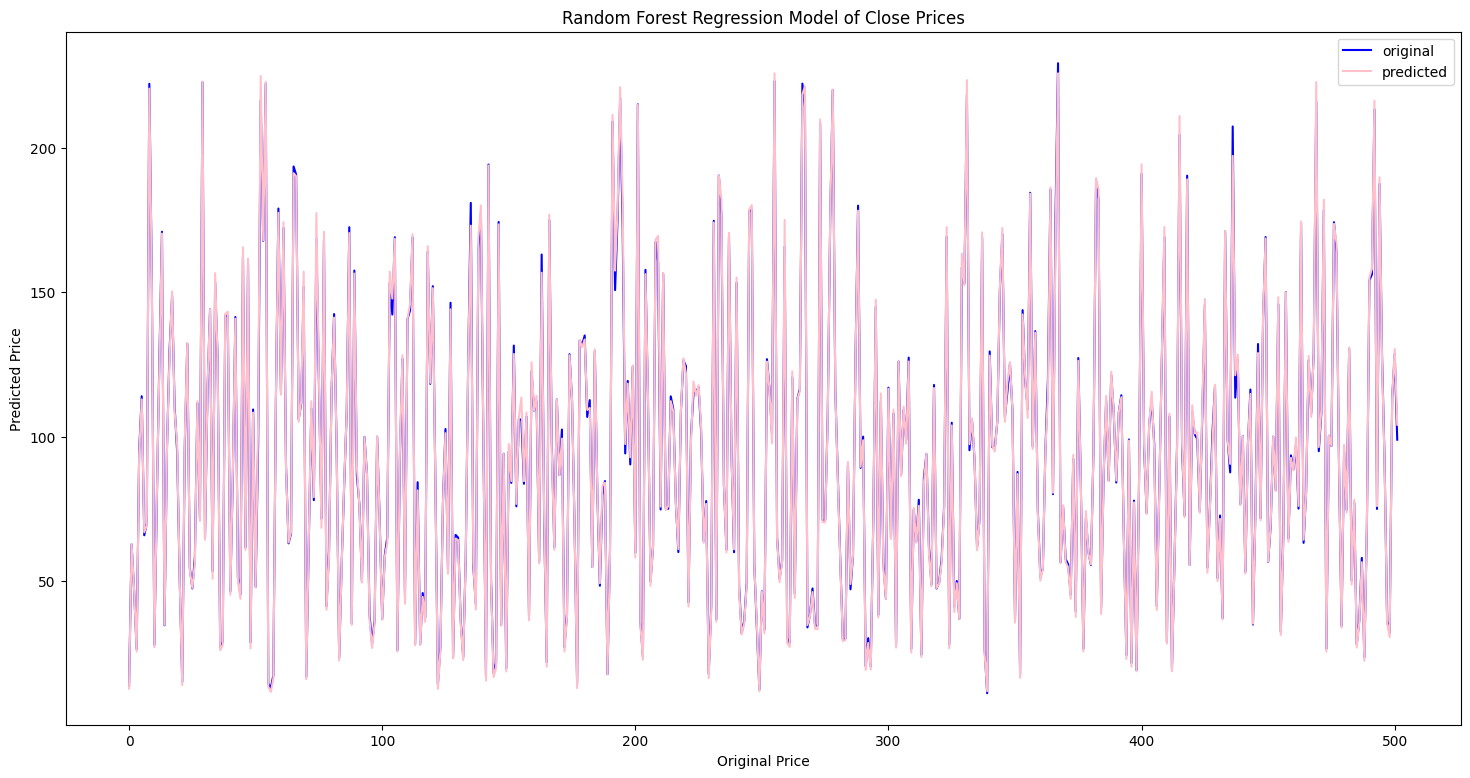

Model Evaluation
Mean Absolute Error: 1.406490497711098
Root Mean Squared Error: 2.084336823924335
Mean Absolute Percentage Error: 1.8620787414250248%


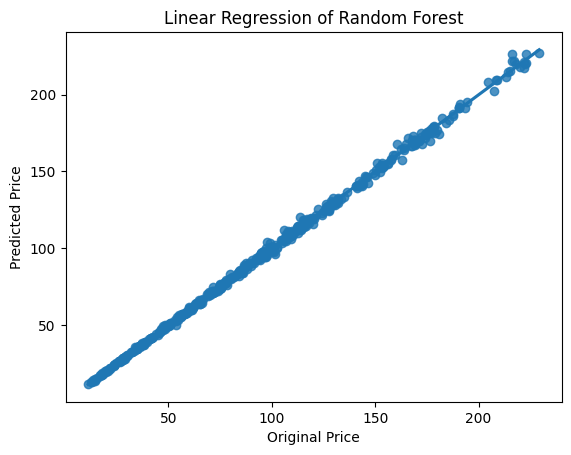

Model Evaluation
Mean Absolute Error: 1.406490497711098
Root Mean Squared Error: 1.675306384081217
Mean Absolute Percentage Error: 1.2044325927223811%


In [26]:
fyp_rForest.rand_forest(apple_df['Close'])

Time Taken:  2 seconds


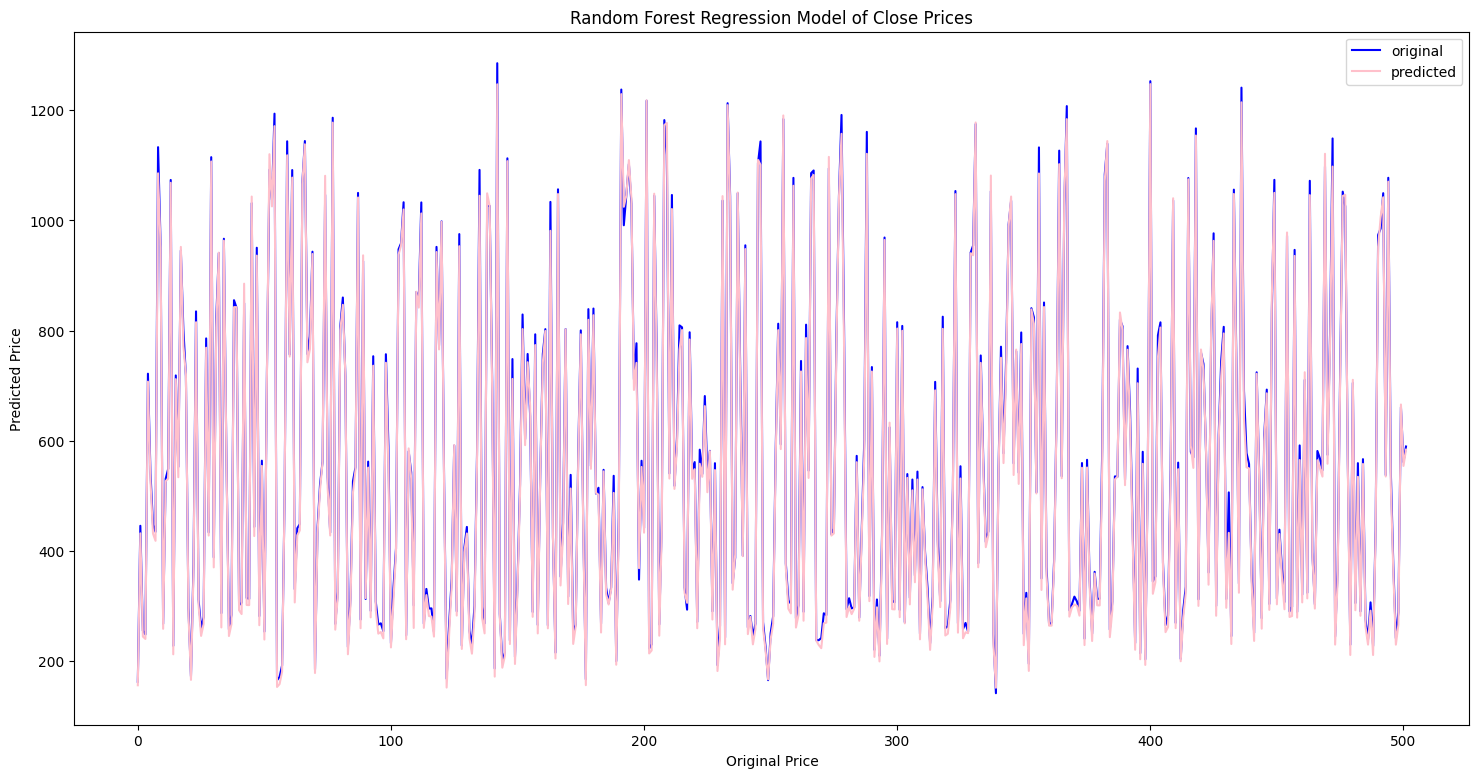

Model Evaluation
Mean Absolute Error: 13.49372845099985
Root Mean Squared Error: 16.347918983438877
Mean Absolute Percentage Error: 3.025268959650366%


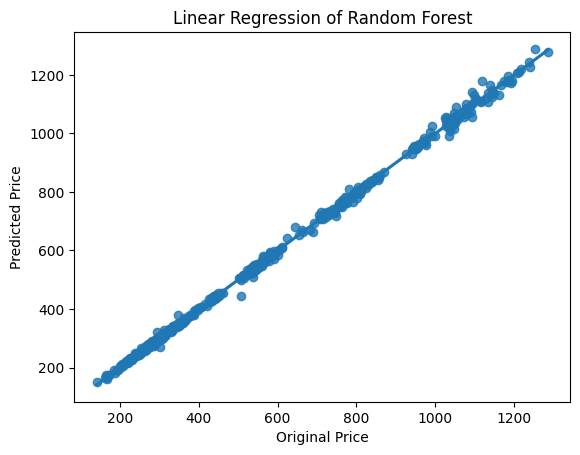

Model Evaluation
Mean Absolute Error: 13.49372845099985
Root Mean Squared Error: 10.24112875027852
Mean Absolute Percentage Error: 1.187032305951233%


In [27]:
fyp_rForest.rand_forest(google_df['Close'])

Time Taken:  2 seconds


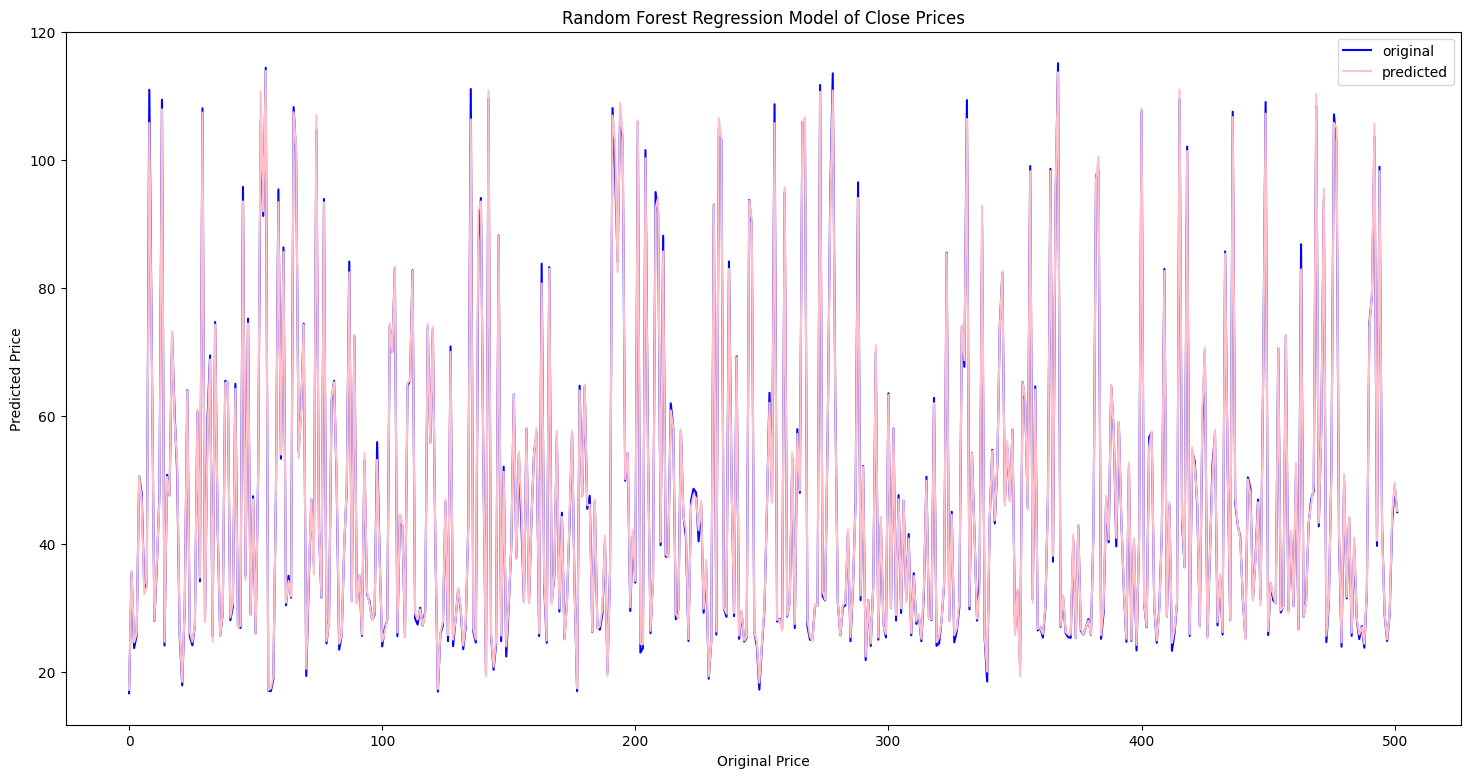

Model Evaluation
Mean Absolute Error: 0.6309694785709997
Root Mean Squared Error: 0.9494360389083046
Mean Absolute Percentage Error: 1.42986968294446%


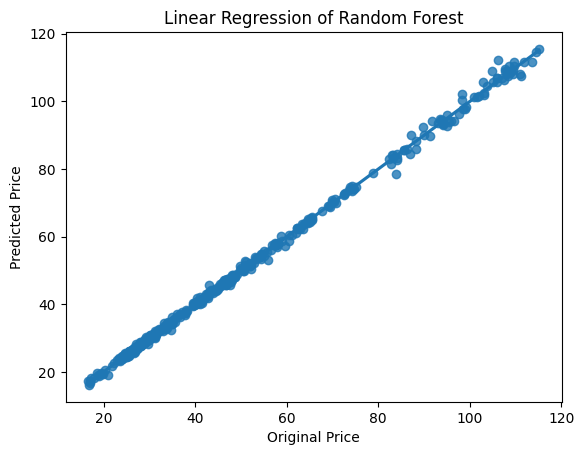

Model Evaluation
Mean Absolute Error: 0.6309694785709997
Root Mean Squared Error: 0.8479015476701979
Mean Absolute Percentage Error: 1.1256694533226594%


In [28]:
fyp_rForest.rand_forest(msft_df['Close'])

### Autoregressive Integrated Moving Average (ARIMA) <a name='arima'></a>

ADF Statistic: -1.239067
p-value: 0.656568


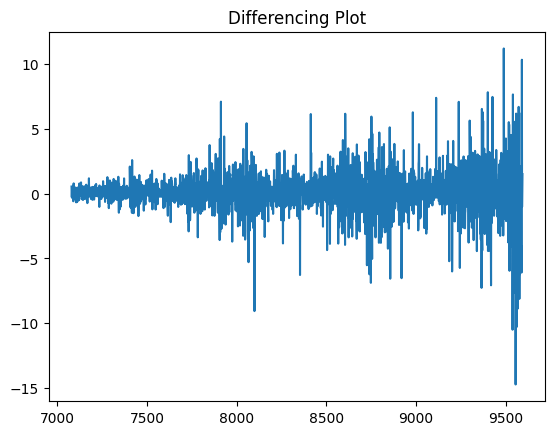

ADF Statistic: -7.662374
p-value: 0.000000


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


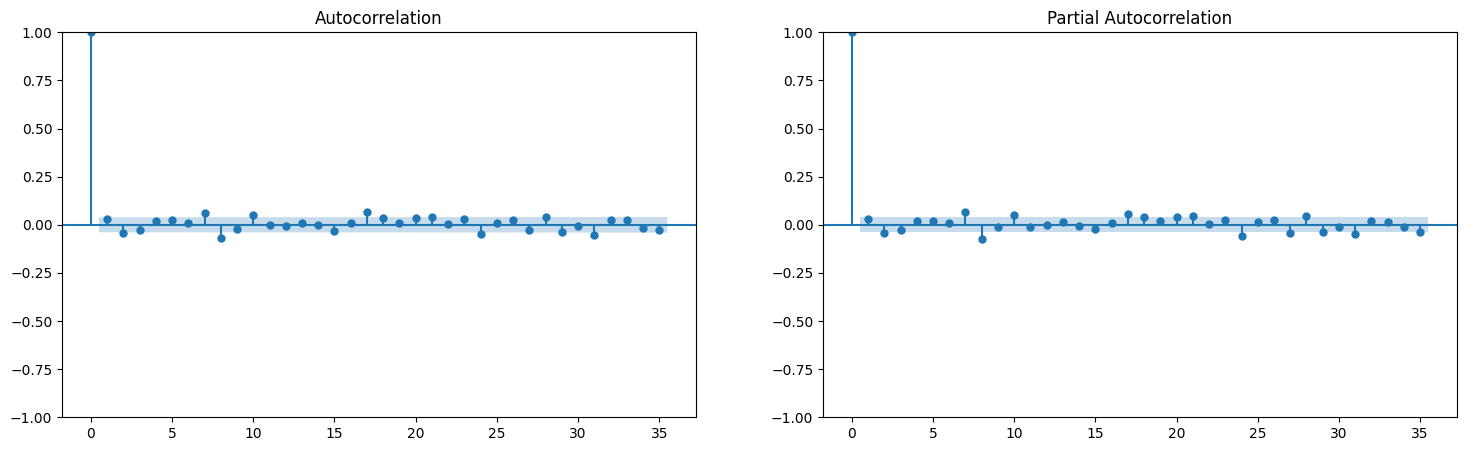

Time Taken:  0 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 124.707
Date:                Fri, 18 Aug 2023   AIC                           -241.414
Time:                        12:24:28   BIC                           -218.987
Sample:                             0   HQIC                          -233.182
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3629      0.006     65.324      0.000       0.352       0.374
ar.L1         -0.5750      0.494     -1.163      0.245      -1.544       0.394
ma.L1          0.5496      0.

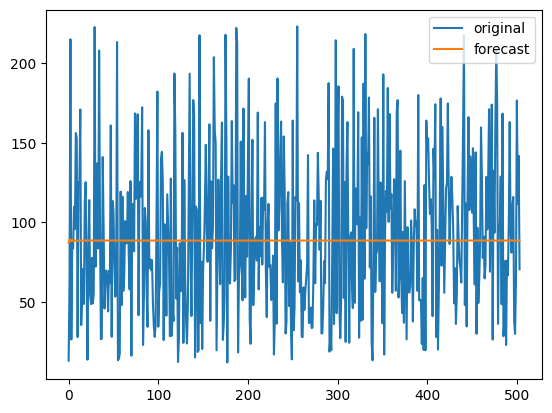

Model Evaluation
Mean Absolute Error: 41.396683077524166
Root Mean Squared Error: 50.41382463372091
Mean Absolute Percentage Error: 74.37512656818642%


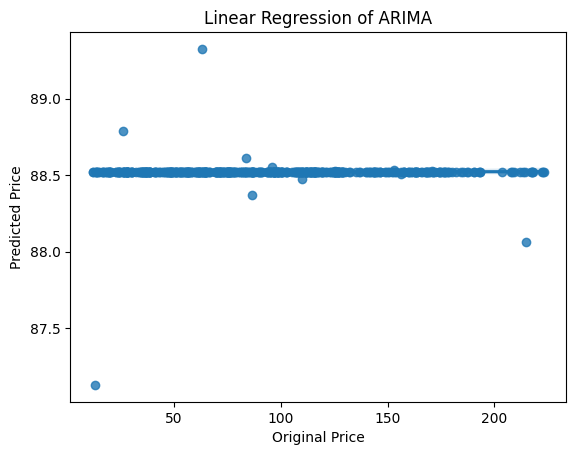

Model Evaluation
Mean Absolute Error: 88.5222208490558
Root Mean Squared Error: 88.52225336902065


In [29]:
fyp_arima.arima(apple_df['Close'])

ADF Statistic: -0.172806
p-value: 0.941686


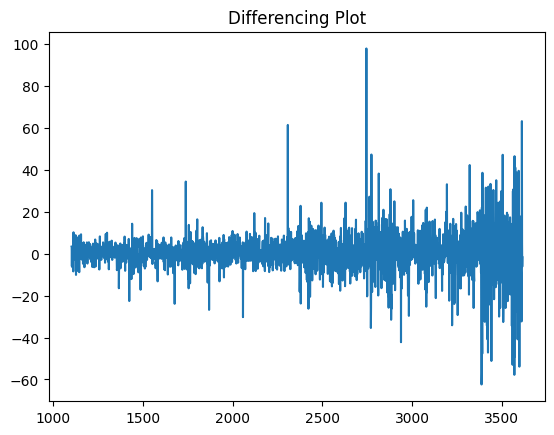

ADF Statistic: -9.378915
p-value: 0.000000


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


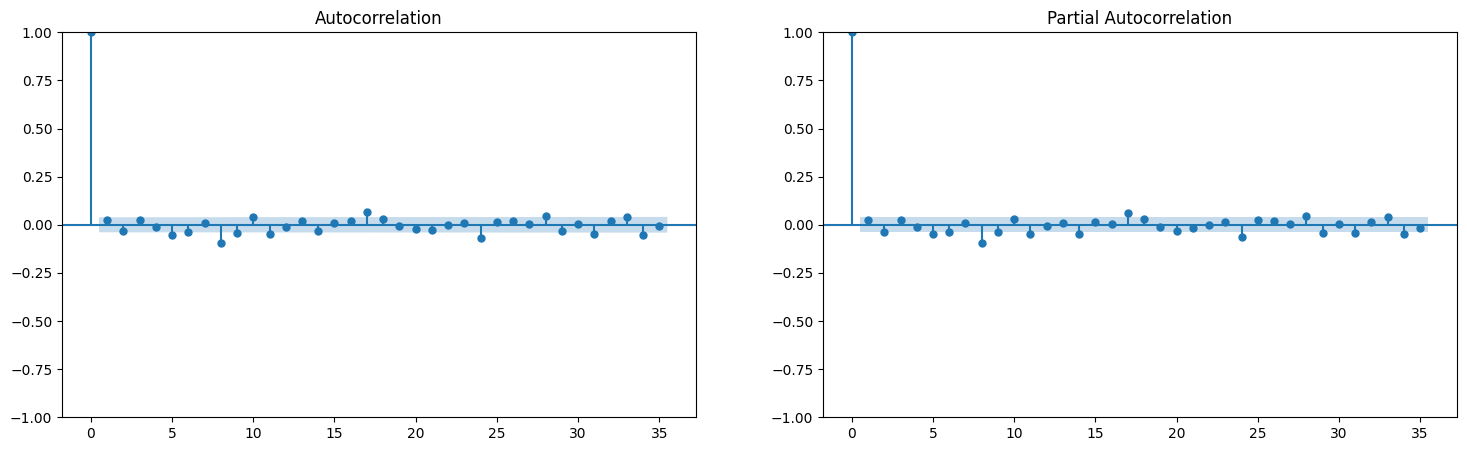

Time Taken:  0 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -136.763
Date:                Fri, 18 Aug 2023   AIC                            281.527
Time:                        12:24:30   BIC                            303.954
Sample:                             0   HQIC                           289.759
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3605      0.007     51.881      0.000       0.347       0.374
ar.L1         -0.5201      0.506     -1.028      0.304      -1.512       0.472
ma.L1          0.4917      0.

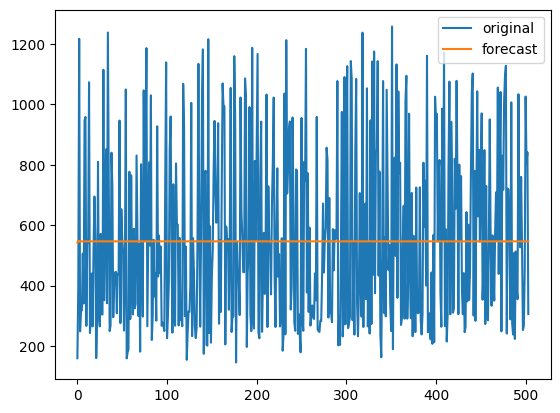

Model Evaluation
Mean Absolute Error: 248.5253214876795
Root Mean Squared Error: 295.3643635189589
Mean Absolute Percentage Error: 58.06869041271454%


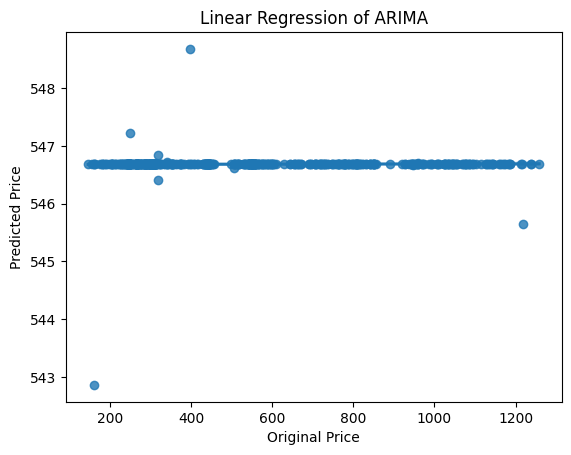

Model Evaluation
Mean Absolute Error: 546.6828843544331
Root Mean Squared Error: 546.68292070554


In [30]:
fyp_arima.arima(google_df['Close'])

ADF Statistic: 1.449094
p-value: 0.997326


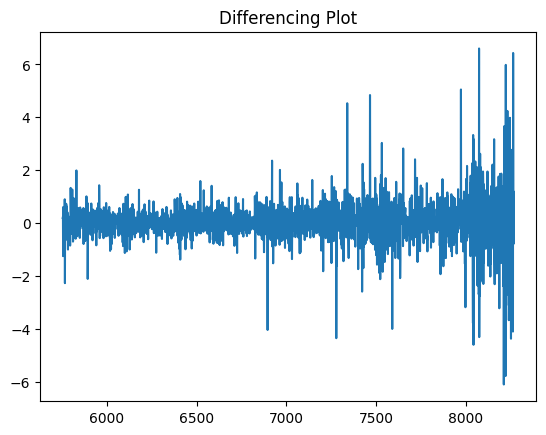

ADF Statistic: -10.828543
p-value: 0.000000


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


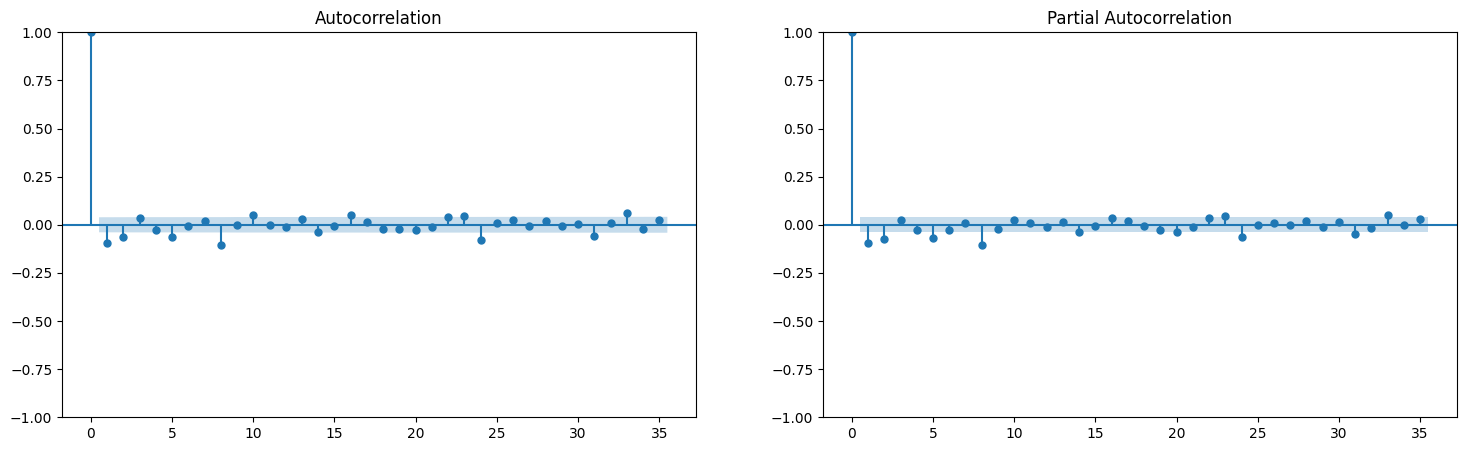

Time Taken:  0 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  35.298
Date:                Fri, 18 Aug 2023   AIC                            -62.596
Time:                        12:24:31   BIC                            -40.169
Sample:                             0   HQIC                           -54.364
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3009      0.008     37.292      0.000       0.285       0.317
ar.L1         -0.6527      0.412     -1.586      0.113      -1.459       0.154
ma.L1          0.6275      0.

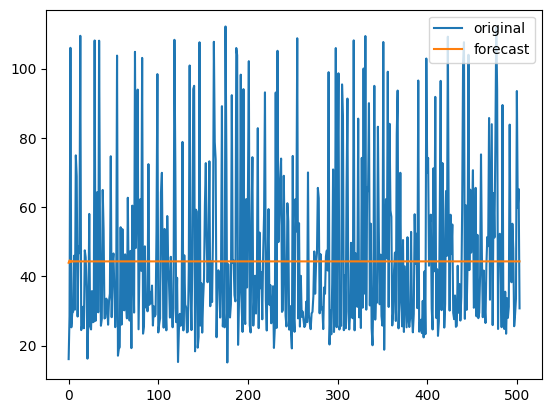

Model Evaluation
Mean Absolute Error: 18.882636023591132
Root Mean Squared Error: 24.17393952717603
Mean Absolute Percentage Error: 45.09716467051555%


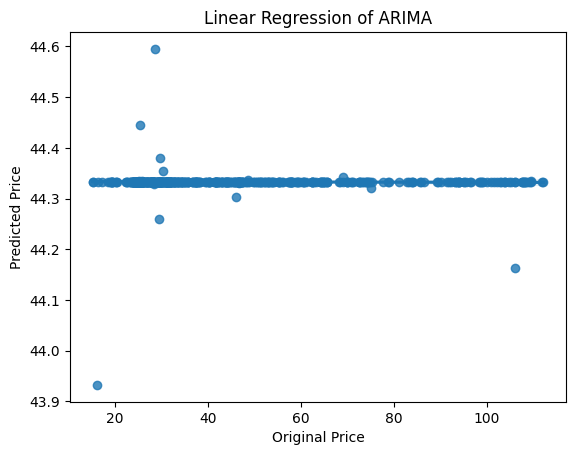

Model Evaluation
Mean Absolute Error: 44.333047185623876
Root Mean Squared Error: 44.33305344819479


In [31]:
fyp_arima.arima(msft_df['Close'])

### Long-Short Term Memory (LSTM) <a name='lstm'></a>

Epoch 1/100
402/402 [==============================] - 4s 4ms/step - loss: 0.0010
Epoch 2/100
402/402 [==============================] - 2s 6ms/step - loss: 1.3313e-04
Epoch 3/100
402/402 [==============================] - 2s 5ms/step - loss: 1.4073e-04
Epoch 4/100
402/402 [==============================] - 2s 5ms/step - loss: 1.3235e-04
Epoch 5/100
402/402 [==============================] - 2s 5ms/step - loss: 1.3678e-04
Epoch 6/100
402/402 [==============================] - 2s 6ms/step - loss: 1.3072e-04
Epoch 7/100
402/402 [==============================] - 2s 4ms/step - loss: 1.4180e-04
Epoch 8/100
402/402 [==============================] - 2s 4ms/step - loss: 1.3211e-04
Epoch 9/100
402/402 [==============================] - 2s 5ms/step - loss: 1.2949e-04
Epoch 10/100
402/402 [==============================] - 3s 6ms/step - loss: 1.3145e-04
Epoch 11/100
402/402 [==============================] - 2s 6ms/step - loss: 1.2956e-04
Epoch 12/100
402/402 [==============================] - 

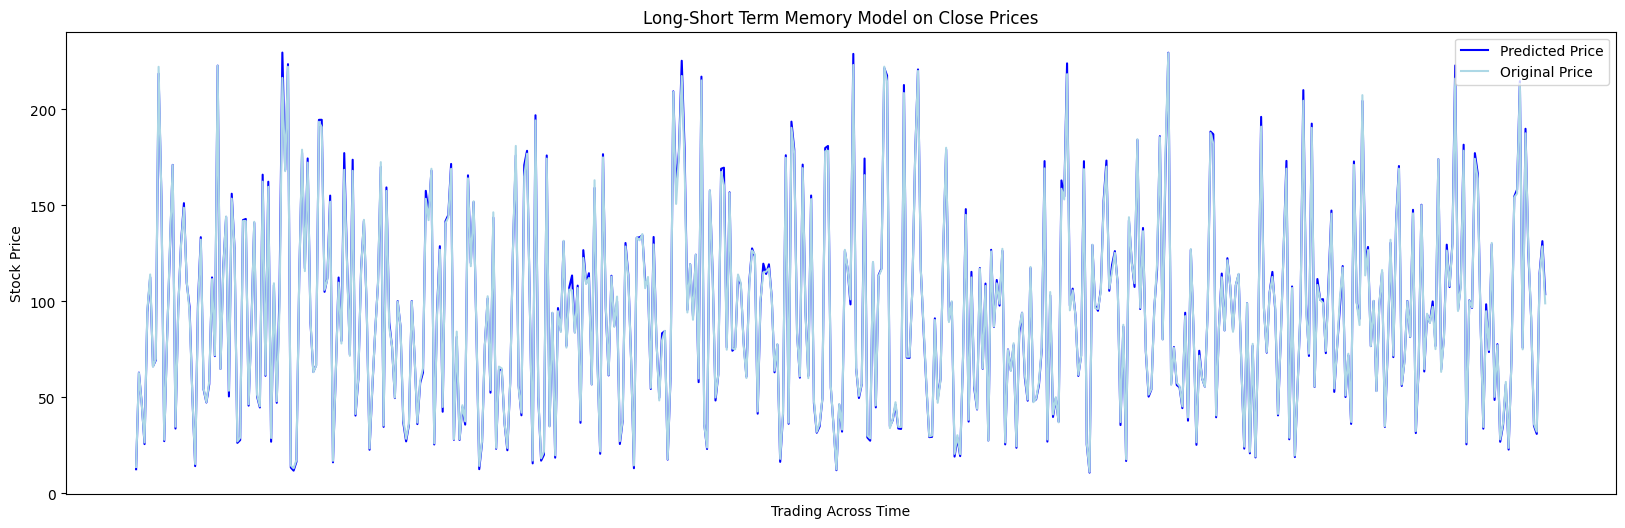

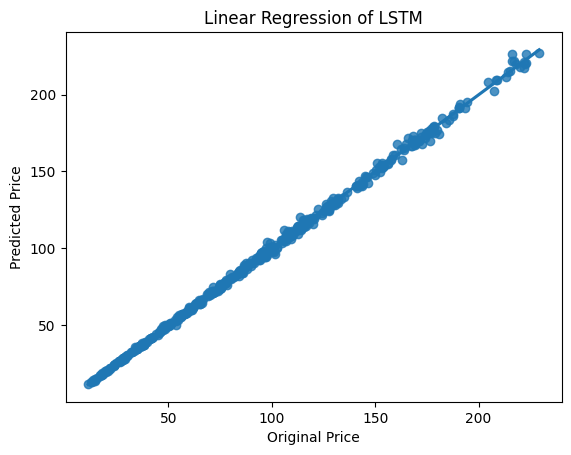

Model Evaluation
Mean Absolute Error: 1.3945928246851467
Root Mean Squared Error: 1.675306384081217
Mean Absolute Percentage Error: 1.2044325927223811%


In [32]:
fyp_lstm.lstm(apple_df['Close'])

Epoch 1/100
402/402 [==============================] - 4s 4ms/step - loss: 0.0521
Epoch 2/100
402/402 [==============================] - 2s 5ms/step - loss: 3.2783e-04
Epoch 3/100
402/402 [==============================] - 1s 3ms/step - loss: 2.9845e-04
Epoch 4/100
402/402 [==============================] - 1s 3ms/step - loss: 2.9337e-04
Epoch 5/100
402/402 [==============================] - 2s 4ms/step - loss: 2.8805e-04
Epoch 6/100
402/402 [==============================] - 2s 6ms/step - loss: 2.8766e-04
Epoch 7/100
402/402 [==============================] - 2s 4ms/step - loss: 2.6641e-04
Epoch 8/100
402/402 [==============================] - 1s 4ms/step - loss: 2.7266e-04
Epoch 9/100
402/402 [==============================] - 2s 4ms/step - loss: 2.6113e-04
Epoch 10/100
402/402 [==============================] - 2s 6ms/step - loss: 2.5460e-04
Epoch 11/100
402/402 [==============================] - 3s 7ms/step - loss: 2.4310e-04
Epoch 12/100
402/402 [==============================] - 

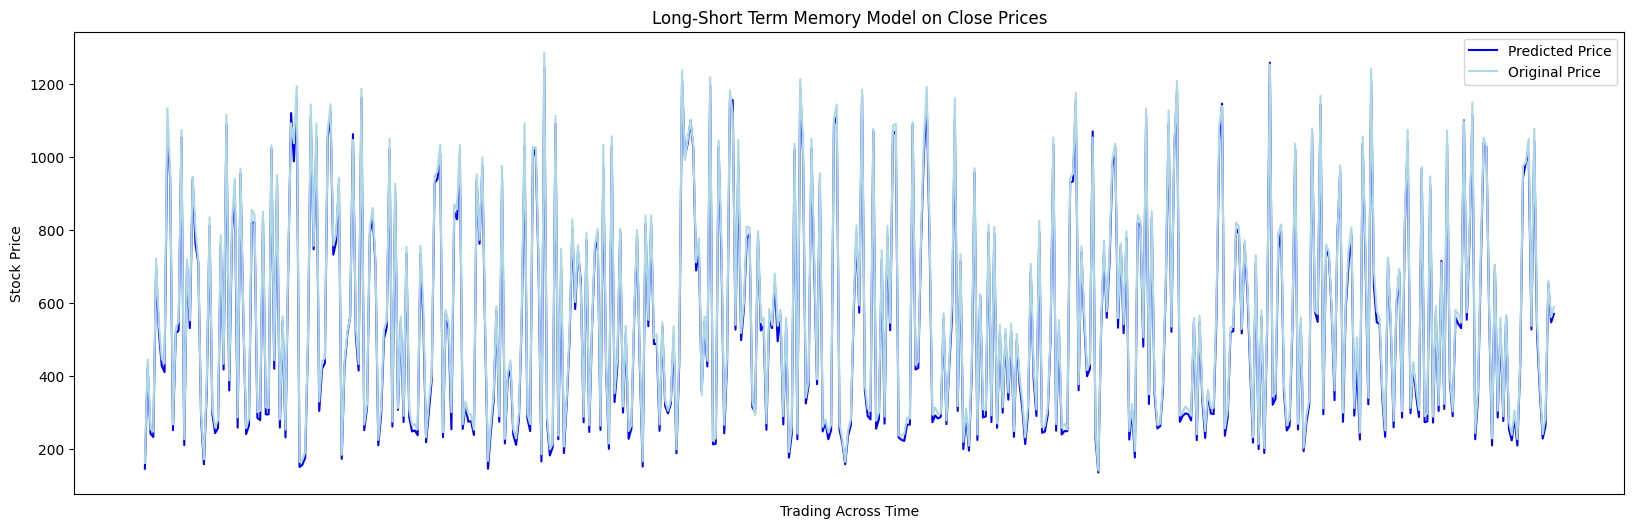

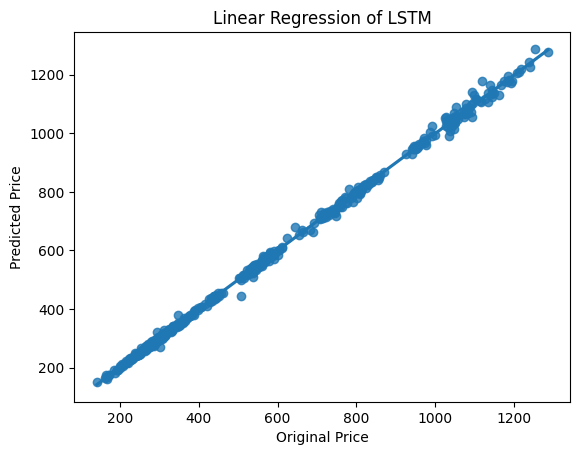

Model Evaluation
Mean Absolute Error: 19.09297383828942
Root Mean Squared Error: 10.24112875027852
Mean Absolute Percentage Error: 1.187032305951233%


In [33]:
fyp_lstm.lstm(google_df['Close'])

Epoch 1/100
402/402 [==============================] - 4s 6ms/step - loss: 0.0143
Epoch 2/100
402/402 [==============================] - 2s 5ms/step - loss: 2.0631e-04
Epoch 3/100
402/402 [==============================] - 2s 4ms/step - loss: 1.5442e-04
Epoch 4/100
402/402 [==============================] - 2s 4ms/step - loss: 1.4534e-04
Epoch 5/100
402/402 [==============================] - 2s 4ms/step - loss: 1.4598e-04
Epoch 6/100
402/402 [==============================] - 1s 4ms/step - loss: 1.4415e-04
Epoch 7/100
402/402 [==============================] - 2s 5ms/step - loss: 1.3445e-04
Epoch 8/100
402/402 [==============================] - 2s 5ms/step - loss: 1.3540e-04
Epoch 9/100
402/402 [==============================] - 2s 5ms/step - loss: 1.3496e-04
Epoch 10/100
402/402 [==============================] - 2s 4ms/step - loss: 1.3010e-04
Epoch 11/100
402/402 [==============================] - 2s 5ms/step - loss: 1.3189e-04
Epoch 12/100
402/402 [==============================] - 

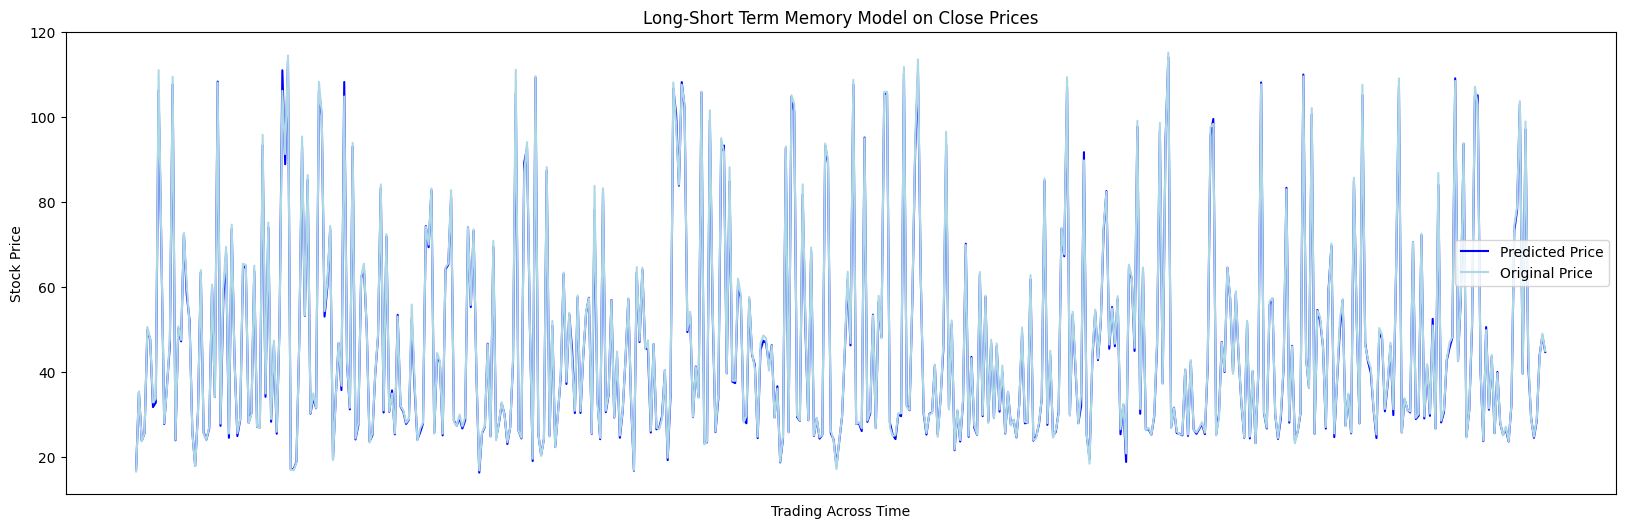

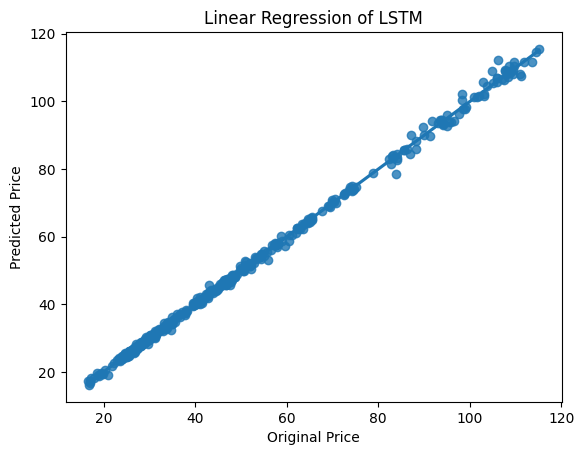

Model Evaluation
Mean Absolute Error: 0.6408180221618407
Root Mean Squared Error: 0.8479015476701979
Mean Absolute Percentage Error: 1.1256694533226594%


In [34]:
fyp_lstm.lstm(msft_df['Close'])

### Convolutional Neural Network (CNN) <a name='cnn'></a>

Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 9.9651e-04
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 2.7098e-04 - accuracy: 9.9651e-04
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1367e-04 - accuracy: 9.9651e-04
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 2.0945e-04 - accuracy: 9.9651e-04
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 2.0936e-04 - accuracy: 9.9651e-04
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 2.0614e-04 - accuracy: 9.9651e-04
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 2.1355e-04 - accuracy: 9.9651e-04
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1022e-04 - accuracy: 9.9651e-04
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 2.0605e-04 - accuracy: 9.9651e-04
Epoch 10/100
63/63 [=====================

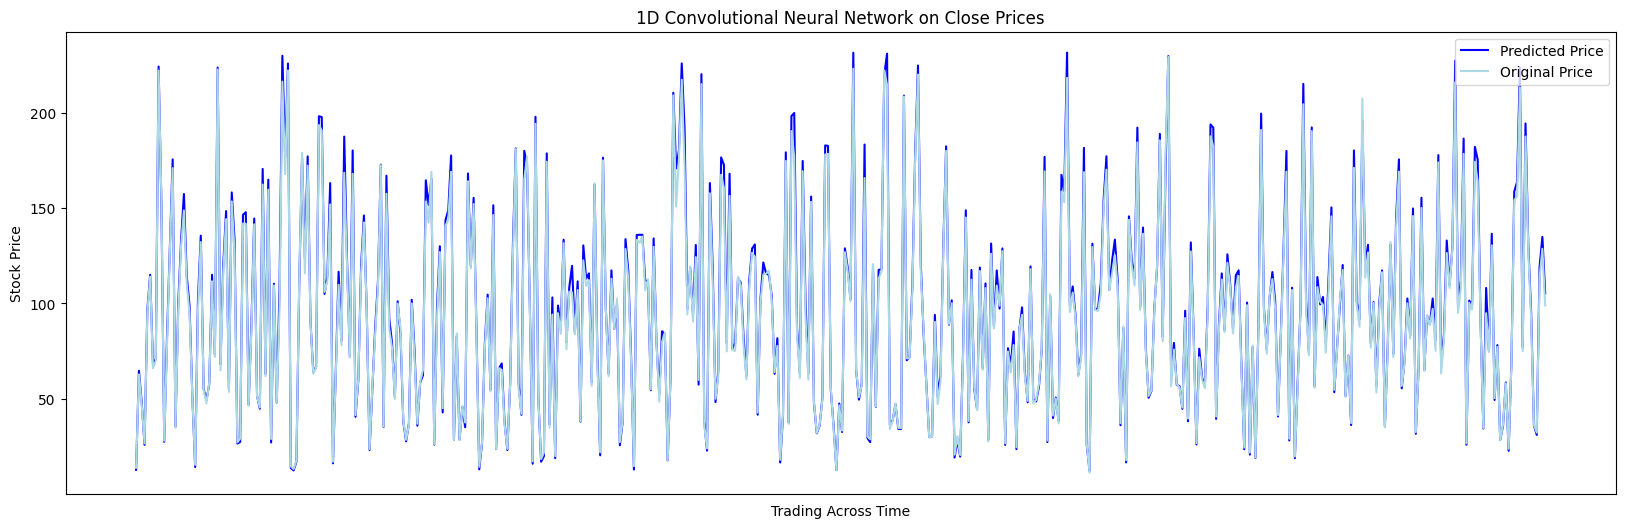

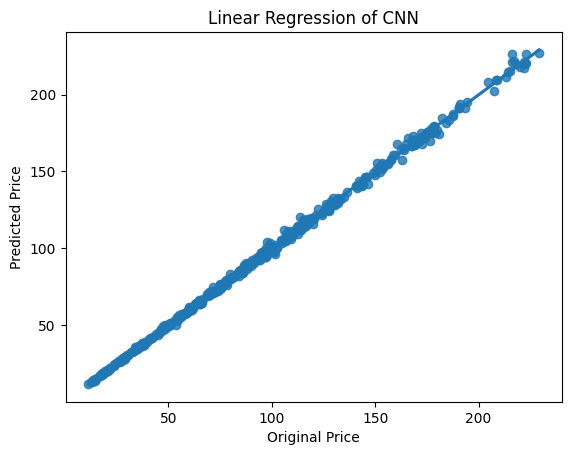

Model Evaluation
Mean Absolute Error: 3.102576901713216
Root Mean Squared Error: 1.675306384081217
Mean Absolute Percentage Error: 1.2044325927223811%


In [35]:
fyp_cnn.CNN(apple_df['Close'])

Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 9.9651e-04
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 3.4952e-04 - accuracy: 9.9651e-04
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 2.6199e-04 - accuracy: 9.9651e-04
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 2.5812e-04 - accuracy: 9.9651e-04
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 2.5691e-04 - accuracy: 9.9651e-04
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 2.5960e-04 - accuracy: 9.9651e-04
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 2.6655e-04 - accuracy: 9.9651e-04
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 2.6059e-04 - accuracy: 9.9651e-04
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 2.5074e-04 - accuracy: 9.9651e-04
Epoch 10/100
63/63 [=====================

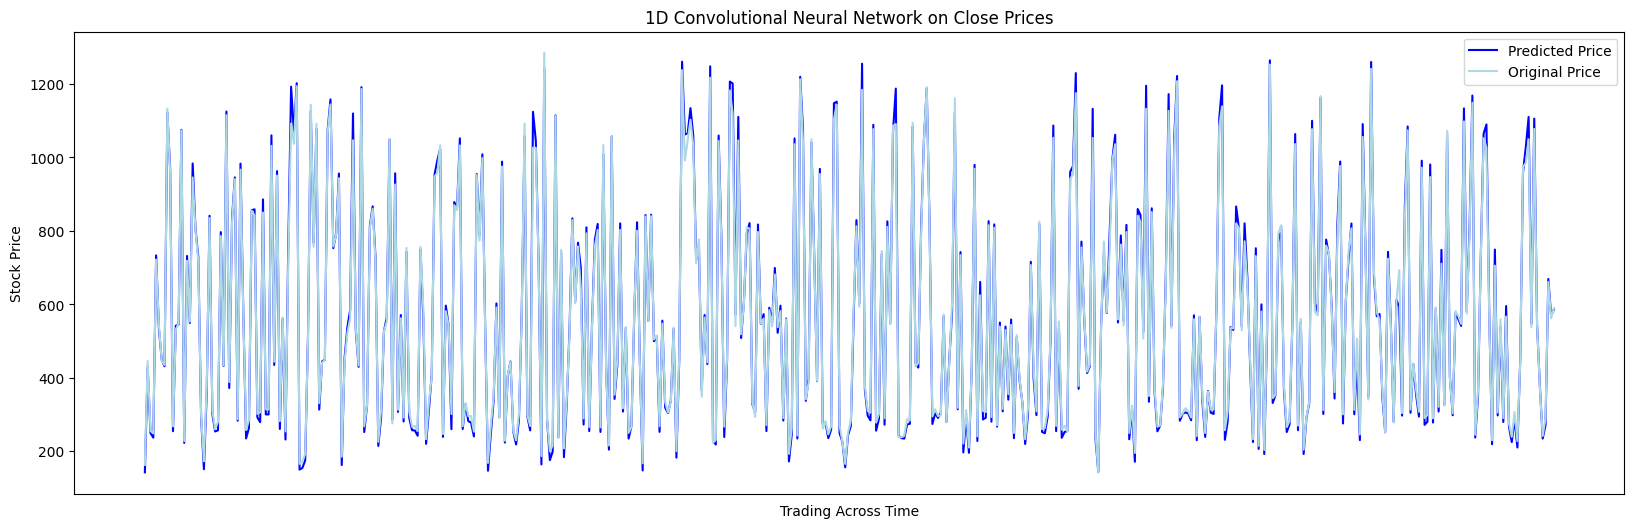

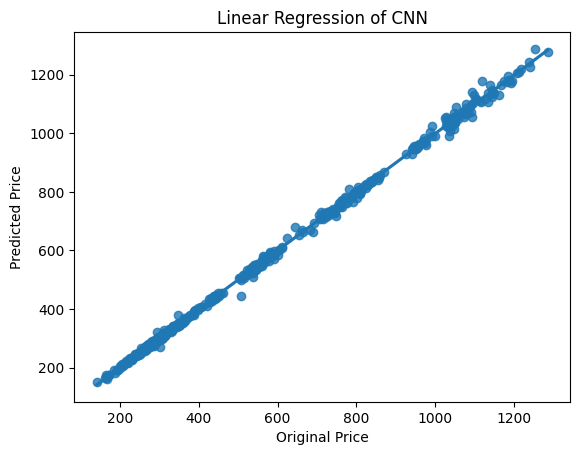

Model Evaluation
Mean Absolute Error: 14.857913773373303
Root Mean Squared Error: 10.24112875027852
Mean Absolute Percentage Error: 1.187032305951233%


In [36]:
fyp_cnn.CNN(google_df['Close'])

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 0.0120 - accuracy: 9.9651e-04
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8151e-04 - accuracy: 9.9651e-04
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7970e-04 - accuracy: 9.9651e-04
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 1.8118e-04 - accuracy: 9.9651e-04
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7753e-04 - accuracy: 9.9651e-04
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7884e-04 - accuracy: 9.9651e-04
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 1.9055e-04 - accuracy: 9.9651e-04
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8275e-04 - accuracy: 9.9651e-04
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 1.7362e-04 - accuracy: 9.9651e-04
Epoch 10/100
63/63 [=====================

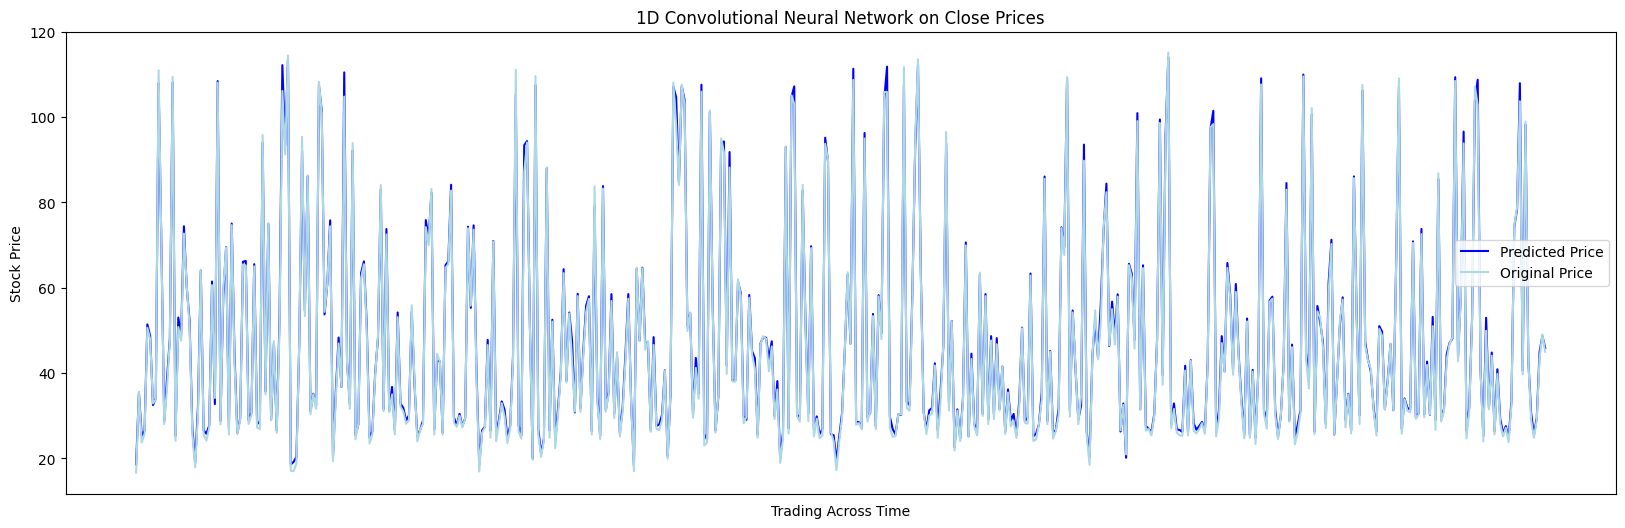

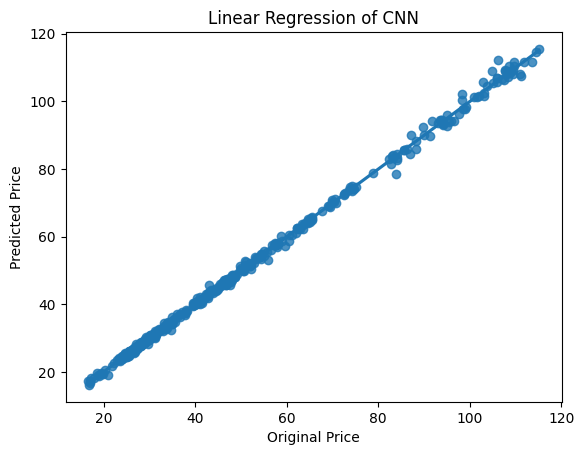

Model Evaluation
Mean Absolute Error: 1.052894075553256
Root Mean Squared Error: 0.8479015476701979
Mean Absolute Percentage Error: 1.1256694533226594%


In [37]:
fyp_cnn.CNN(msft_df['Close'])

### Joint ML Evaluation <a name='eval'></a>

In [38]:
# plt.plot(fyp_rForest.mae, label = 'random forest')
# plt.plot(fyp_arima.mae, label = 'arima')
# plt.plot(fyp_lstm.mae, label = 'lstm')
# plt.plot(fyp_cnn.mae, label = 'cnn')

# # plt.xlabel()
# # plt.ylabel()
# plt.legend()
# plt.title('Linear Regression Evaluation of ML Models used')
# plt.show()

### Decision Tree Classifier (DTC) <a name='dtc'></a>

1       4
2    1224
0    1288
Name: Decision, dtype: int64
Accuracy Score Percentage: 77.38%
Precision Score Percentage: 77.41%
Recall Score Percentage: 77.44%
F1 Score Percentage: 77.38%


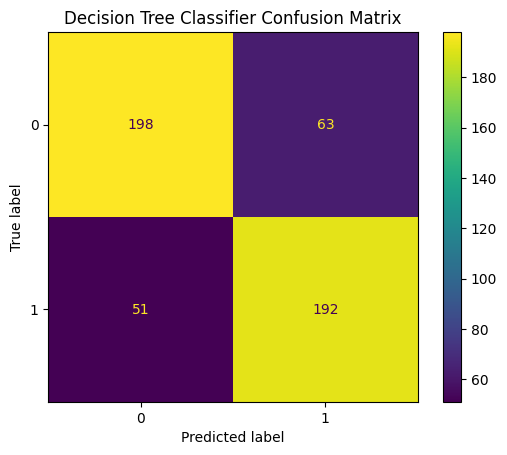

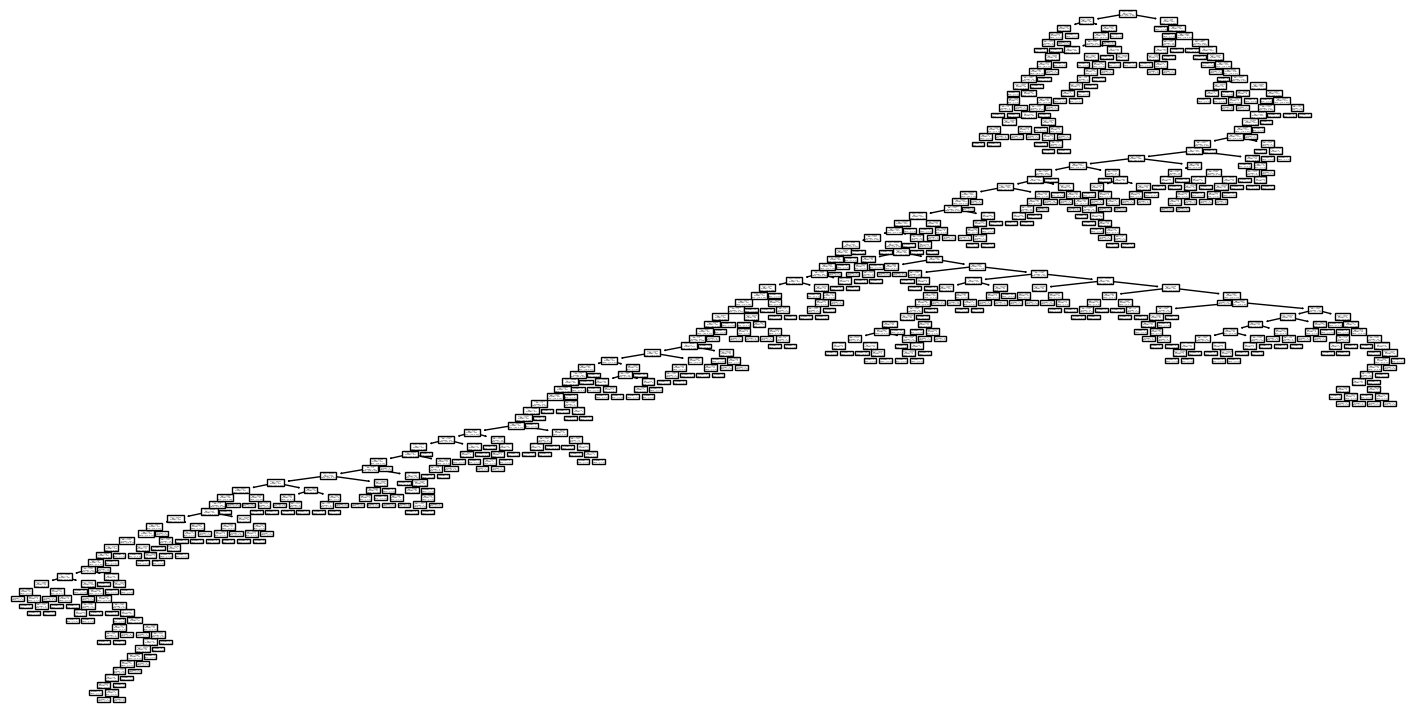

In [39]:
fyp_dtc.dtc(apple_df, 'apple')

1       3
2    1253
0    1260
Name: Decision, dtype: int64
Accuracy Score Percentage: 81.15%
Precision Score Percentage: 54.09%
Recall Score Percentage: 54.06%
F1 Score Percentage: 54.07%


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


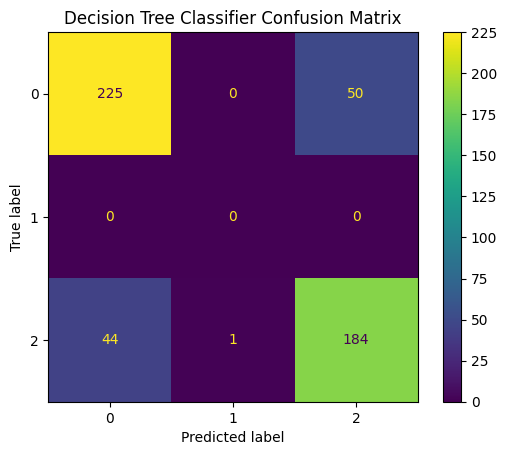

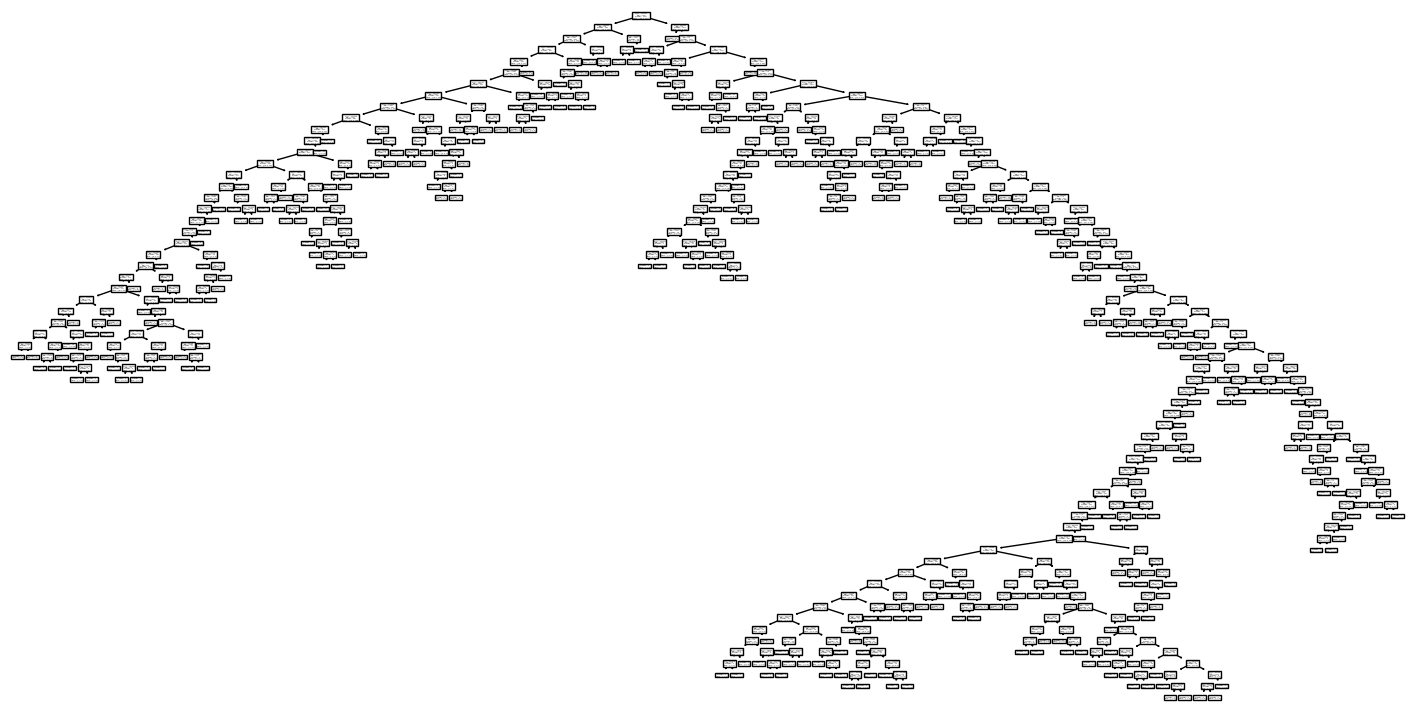

In [40]:
fyp_dtc.dtc(google_df, 'google')

1      35
2    1199
0    1282
Name: Decision, dtype: int64
Accuracy Score Percentage: 77.78%
Precision Score Percentage: 53.34%
Recall Score Percentage: 52.15%
F1 Score Percentage: 52.74%


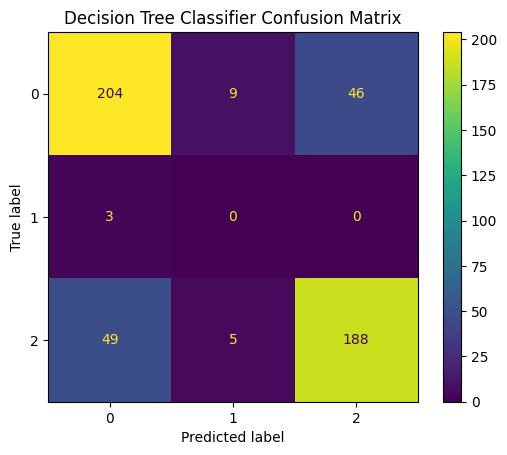

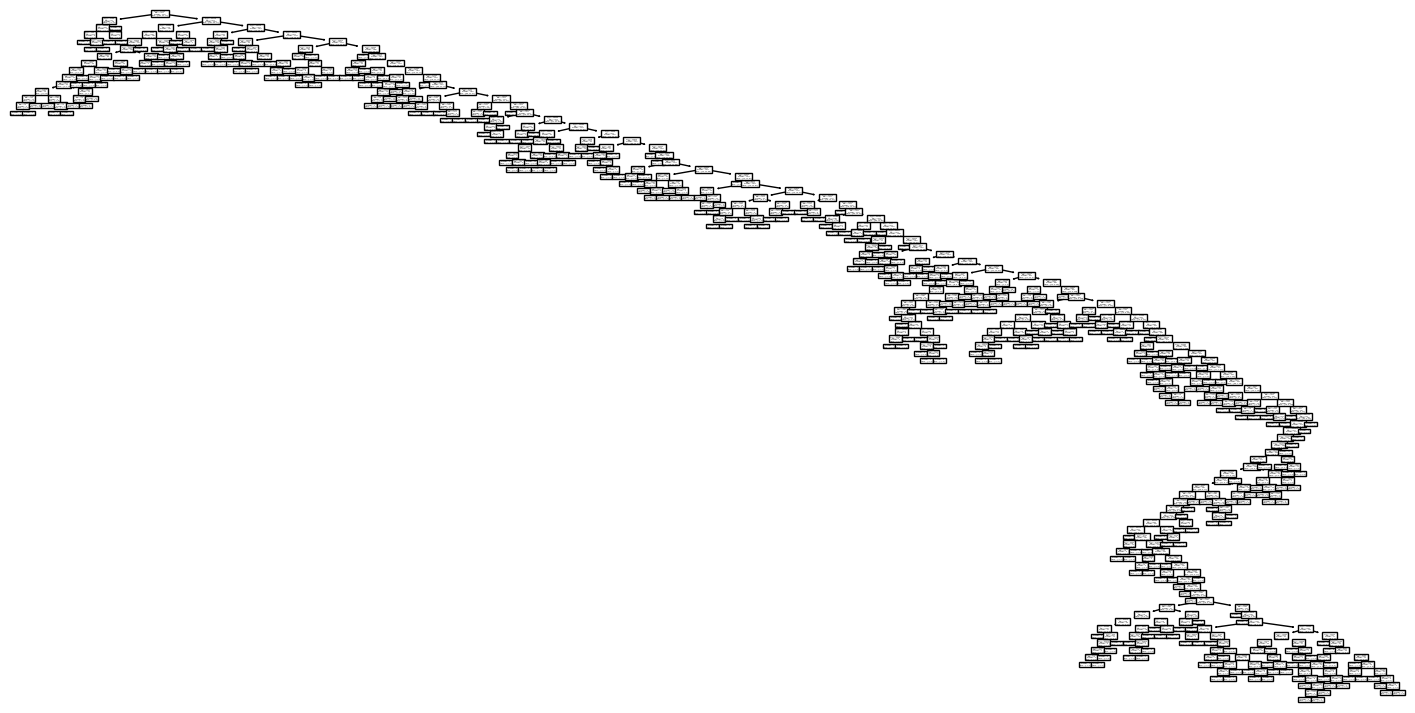

In [41]:
fyp_dtc.dtc(msft_df, 'msft')